In [ ]:
from google.colab import files
from IPython.display import Image
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint, quad
import matplotlib.pyplot as plt

Maximum Negative Numpy Array

In [ ]:
import numpy as np
def row_max (max_list):
  max_list=max_list[max_list < 0]
  if len (max_list)==0:
    return 0
  return max_list.max()


def MaxNegMat(max_list):
  sum=0
  for i in range(max_list.shape[0]):
    sum+=row_max(max_list[i,:])
  return sum

arr= np.random.randint(-10, 10, size=(3,3))
print(arr)
row_max(arr)

[[ 1 -5  9]
 [ 8  9 -3]
 [ 6 -1  6]]


-1

# Kalman Filter

In [ ]:
uploaded = files.upload()

Saving Kalman.png to Kalman.png


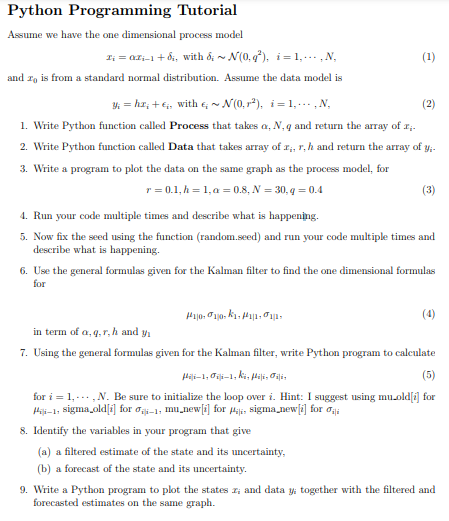

In [ ]:
Image('Kalman.png', width=500)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

def Process(al,N,q):
    x=np.zeros((N+1))
    x[0]=np.random.normal(0,1)
    for i in range(1,N+1):
        x[i]=al*x[i-1]+np.random.normal(0,q)
    return x



In [ ]:
def Data(x,r,h):
    N=len(x)-1
    y=np.zeros(N)
    y=h*x[1:]+np.random.normal(0,r)
    return y



<function matplotlib.pyplot.show(*args, **kw)>

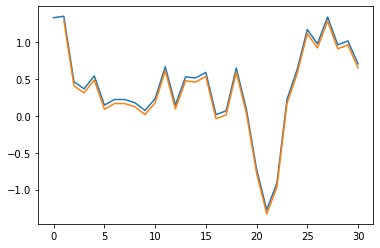

In [ ]:
al=0.8
N=30
q=0.4
r=0.1
h=1
x=Process(al,N,q)
y=Data(x,r,h)
plt.plot(np.arange(N+1),x)
plt.plot(np.arange(1,N+1),y)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

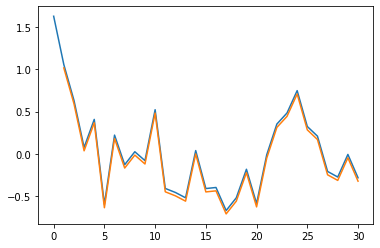

In [ ]:
np.random.seed(1)
al=0.8
N=30
q=0.4
r=0.1
h=1
x=Process(al,N,q)
y=Data(x,r,h)
plt.plot(np.arange(N+1),x)
plt.plot(np.arange(1,N+1),y)
# plt.plot(x[1:])
# plt.plot(y)
plt.show

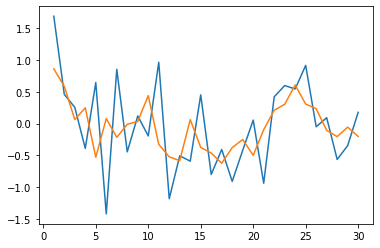

In [ ]:
np.random.seed(1)
mu_old=np.empty(N)
sigma_old=np.empty(N)
K=np.empty(N)
mu_new=np.empty(N)
sigma_new=np.empty(N)

mu_old[0]=0
sigma_old[0]=q+al**2

for i in range(N):
    K[i]=sigma_old[i]*h*((h*sigma_old[i]*h+r)**(-1))
    mu_new[i]=mu_old[i]+K[i]*(y[i]-h*mu_old[i])
    sigma_new[i]=(1-K[i]*h)*sigma_old[i]
    if i!=N-1:
        mu_old[i+1]=al*mu_new[i]
        sigma_old[i+1]=q+al*sigma_new[i]*al
# mu_old,sigma_old,K,mu_new,sigma_new
plt.plot(np.arange(1,N+1),np.random.normal(mu_old,sigma_old))
plt.plot(np.arange(1,N+1),np.random.normal(mu_new,sigma_new))
plt.show()

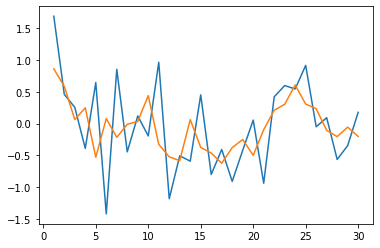

In [ ]:
np.random.seed(1)
mu_old=np.empty(N)
K=np.empty(N)
mu_new=np.empty(N)
sigma_new=np.empty(N)
sigma_old=np.empty(N)

mu_old[0]=0
sigma_old[0]=q+al**2
K[0]=sigma_old[0]*h*((h*sigma_old[0]*h+r)**(-1))
mu_new[0]=mu_old[0]+K[0]*(y[0]-h*mu_old[0])
sigma_new[0]=(1-K[0]*h)*sigma_old[0]

for i in range(1,N):
    mu_old[i]=al*mu_new[i-1]
    sigma_old[i]=q+al*sigma_new[i-1]*al
    K[i]=sigma_old[i]*h*((h*sigma_old[i]*h+r)**(-1))
    mu_new[i]=mu_old[i]+K[i]*(y[i]-h*mu_old[i])
    sigma_new[i]=(1-K[i]*h)*sigma_old[i]
#mu_old,sigma_old,K,mu_new,sigma_new
plt.plot(np.arange(1,N+1),np.random.normal(mu_old,sigma_old))
plt.plot(np.arange(1,N+1),np.random.normal(mu_new,sigma_new))
plt.show()

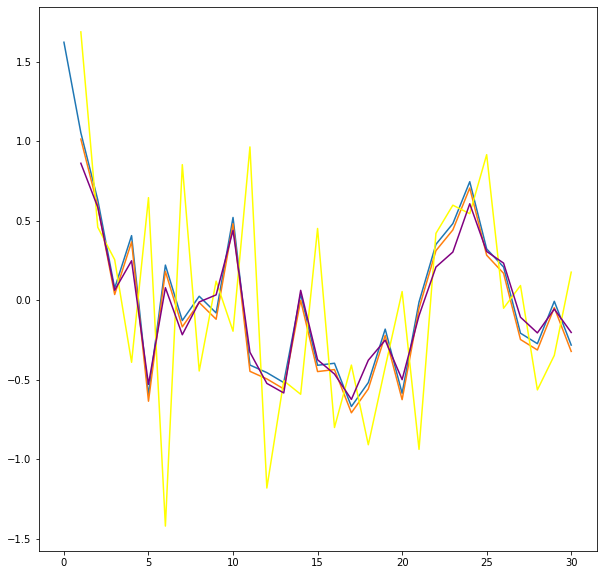

In [ ]:
np.random.seed(1)
plt.figure(figsize=(10,10)) 
plt.plot(np.arange(N+1),x)
plt.plot(np.arange(1,N+1),y)
plt.plot(np.arange(1,N+1),np.random.normal(mu_old,sigma_old),color='yellow',label='Forecast')
plt.plot(np.arange(1,N+1),np.random.normal(mu_new,sigma_new),color='purple',label='Filtering')
plt.show()

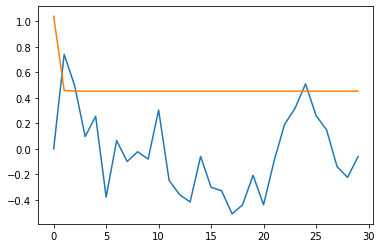

In [ ]:
# plt.plot(np.arange(N+1),x)
# plt.plot(np.arange(1,N+1),y)
plt.plot(mu_old)
plt.plot(sigma_old)
# plt.plot(mu_new)
# plt.plot(sigma_new)
plt.show()

# **ODES**

**First Oder Differential** 


\begin{equation}
  \begin{cases}
    y' = 2y + e^{2x},      & \quad \text{on } [0, 1]\\\\
    y(0) = 3,
  \end{cases}
\end{equation}
with exact solution $g(x) = (x+3)e^{2x}$. 

**Euler**


Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$).

Write a python function <b> EulerMethod </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using Euler method i.e.
$$ y_{k+1} = y_k + Hf(x_k,y_k) $$

**RK2 Method**

Write a python function <b> RK2Method </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using second order Runge-Kutta  method i.e.
\begin{equation}
\begin{cases}
\alpha = f(x_k,y_k)\\\\
y_{k+1} = y_k + Hf(x_k+\dfrac{H}{2}, y_k + \dfrac{H}{2}\alpha)
\end{cases}
\end{equation}

In [ ]:
#First Order Differential Equations
f=lambda y, x: (2*y)+(np.exp(2*x))

#Odeint
def Ode(a,b,c,N,f):
  x=np.linspace(a,b,N+1)
  y_init=c
  y = odeint(f,y_init,x)
  return x, y
ode_x, ode_y =Ode(a=0,b=1,c=3,N=200,f=f)
# ode_y

#Euler
def EulerMethod(a,b,c,N,f):
  x=np.linspace(a,b,N+1)  #N+1 since its 0 to N
  y=np.zeros(len(x))
  H=x[1]-x[0]
  y[0]=c
  #We have to use the for loop because of the updating
  for i in range(0, N):
    y[i+1] = y[i] + f(y[i], x[i]) * H
  return x, y
e_x, e_y=EulerMethod(a=0,b=1,c=3,N=200,f=f)
# e_y

# #RK2
def RK2Method (a,b,c,N,f):
  x=np.linspace(a,b,N+1)  #N+1 since its 0 to N
  y=np.zeros(len(x))
  H=x[1]-x[0]
  y[0]=c
  for i in range(0, N):
    y[i+1] = y[i] + H * f(y[i] + ((H/2) * f(y[i], x[i])), x[i] + (H / 2.0))
  return x, y
r2_x, r2_y=RK2Method (a=0,b=1,c=3,N=200,f=f)
# r2_y



#RK4
def RK4Method (a,b,c, N, f):
  x=np.linspace(a,b,N+1)
  y=np.zeros(len(x))
  H=x[1]-x[0]
  y[0]=c
  for i in range(N):
    k1 = H * f(y[i], x[i])
    k2 = H * f(y[i] + 0.5 * k1, x[i] + 0.5 * H)
    k3 = H * f(y[i] + 0.5 * k2, x[i] + 0.5 * H)
    k4 = H * f(y[i] + k3, x[i+1])
    y[i+1] = y[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0
  return x, y
r4_x, r4_y=RK4Method (a=0,b=1,c=3,N=200,f=f)
r4_y

#Heuns Method
def Heun_Method (a,b,c, N, f):
  x=np.linspace(a,b,N+1)
  y=np.zeros(len(x))
  H=x[1]-x[0]
  y[0]=c
  for i in range(N):
    k1 = H * f(y[i], x[i])
    k2 = H * f(y[i] + k1, x[i+1])
    y[i+1] = y[i] + ( k1 + k2 ) / 2.0
  return x,y


h_x, h_y= Heun_Method(a=0,b=1,c=3,N=200,f=f)
# h_y

**Higher Order**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + 2\dfrac{d y}{dx}=30e^{3x} \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=8 , y(a) = 2 
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.


In [ ]:
#Higher Order Differential Equation
# def models(u,t):
#     x1,x2 = u
#     dx1dt=x1+x2
#     dx2dt=4*x1-2*x2
#     return np.array([dx1dt, dx2dt])

def models(y,x):
  y,z = y
  dydx = z
  dzdx = 30*np.exp(3*x)-2*z
  return np.array([dydx,dzdx])

# odeint
def SODE(a,b,H):
    # initial condition
    y0 = [2,8]
    # time points
    N = int((b-a)/H + 1)
    x = np.linspace(a,b,N)
    u = odeint(models,y0,x)
    return x, u[:,0]
Sode_x, Sode_y = SODE(0,2,0.001)
print(Sode_y)

# Euler
def full_Euler_high(h, f, init_cond, start_t=0, end_t=1):
  deg = len(init_cond) # The order of the ODE is equal to the number of initial conditions we need
  N = int((end_t - start_t) / h+1)
  t_list = np.linspace(start_t, end_t, N)
  M = np.zeros((deg, N + 1)) # Matrix storing the values of the variable we wish to solve for(the zeroth derivative), as well as the higher order derivatives
  M[:, 0] = init_cond # Storing the initial conditions
  for i in range(0, N):
    M[:,i + 1] = M[:, i] + h*f(M[:,i], t_list[i]) # Running N Euler steps
  return M, t_list

print(full_Euler_high(h=0.001, f=models, init_cond=np.array([2,8]), start_t=0, end_t=2)[0][0])

#RK2
def full_RK2Method_high (h,f,init_cond, start_t=0, end_t=1):
  deg = len(init_cond) # The order of the ODE is equal to the number of initial conditions we need
  N = int((end_t - start_t) / h+1)
  t_list = np.linspace(start_t, end_t, N)
  M = np.zeros((deg, N + 1)) # Matrix storing the values of the variable we wish to solve for(the zeroth derivative), as well as the higher order derivatives
  M[:, 0] = init_cond # Storing the initial conditions
  for i in range(0, N):
    M[:,i + 1] = M[:, i] + h*f(M[:,i] + ((h/2) * f(M[:,i], t_list[i])), t_list[i] + (h/2)) # Running N Euler steps
  return M, t_list

# full_RK2Method_high (h=0.001, f=models, init_cond=np.array([2,8]), start_t=0, end_t=2)[0][0]

#RK4
def full_RK4Method_high (h,f,init_cond, start_t=0, end_t=1):
  deg = len(init_cond) # The order of the ODE is equal to the number of initial conditions we need
  N = int((end_t - start_t) / h+1)
  t_list = np.linspace(start_t, end_t, N)
  M = np.zeros((deg, N + 1)) # Matrix storing the values of the variable we wish to solve for(the zeroth derivative), as well as the higher order derivatives
  M[:, 0] = init_cond # Storing the initial conditions
  for i in range(0, N):
    k1 = h * f(M[:, i], t_list[i])
    k2 = h * f(M[:,i] + 0.5 * k1, t_list[i] + 0.5 * h)
    k3 = h * f(M[:,i] + 0.5 * k2, t_list[i] + 0.5 * h)
    k4 = h * f(M[:, i] + k3, t_list[i])
    M[:,i + 1] = M[:, i] + (k1 + 2 * (k2 + k3) + k4)/6 # Running N Euler steps
  return M, t_list

full_RK4Method_high (h=0.001, f=models, init_cond=np.array([2,8]), start_t=0, end_t=2)[0][0]

# Heuns Method
def full_Heuns_high (h,f,init_cond, start_t=0, end_t=1):
  deg = len(init_cond) # The order of the ODE is equal to the number of initial conditions we need
  N = int((end_t - start_t) / h+1)
  t_list = np.linspace(start_t, end_t, N)
  M = np.zeros((deg, N + 1)) # Matrix storing the values of the variable we wish to solve for(the zeroth derivative), as well as the higher order derivatives
  M[:, 0] = init_cond # Storing the initial conditions
  for i in range(0, N):
    # k1 = f(M[:, i], t_list[i])
    # k2 = f(M[:, i] + h*k1, t_list[i]+h)
    # M[:,i + 1] = M[:, i] + h*( k1 + k2 ) / 2

    k1 = h * f(M[:, i], t_list[i])
    k2 = h * f(M[:, i] + k1, t_list[i])
    M[:,i + 1] = M[:, i] + ( k1 + k2 ) / 2 # Running N Euler steps
  return M, t_list

full_Heuns_high (h=0.001, f=models, init_cond=np.array([2,8]), start_t=0, end_t=2)[0][0]



**System of Differential Equations**

$$
\begin{cases}
\dfrac{dx}{dt}& = & e^t\\
\dfrac{dy}{dt}& = & x+2t\\
\dfrac{dz}{dt}& = & 3y-10t
\end{cases}
$$


Initial conditions

$$x(0) = 1, y(0) = -2, z(0) = 0$$

Particular solution

$$c_1 = 1, c_2 = -2, c_3 = -3$$

$$
\begin{cases}
x(t)& = & e^t\\
y(t)& = & e^t+t^2-3\\
z(t)& = & 3e^t+t^3-9t-5t^2-3
\end{cases}
$$

In [ ]:
def models(u, t):
  x, y, z =u
  dxdt= np.exp(t)
  dydt= x + 2*t
  dzdt= 3*y - 10*t
  return np.array([dxdt, dydt, dzdt])

# odeint
def SODE(a,b,H):
    # initial condition
    y0 = [1, -2, 0]
    # time points
    N= int((b-a)/H + 1)
    t = np.linspace(a, b, N)     
    u = odeint(models,y0,t)
    return t, u

Sode_t, Sode_y = SODE(0,2,0.001)
np.shape(Sode_y)
o_x=Sode_y[:,0]
o_y=Sode_y[:,1]
o_z=Sode_y[:,2]
# print(o_y)
# xt=np.exp(Sode_t)
# plt.plot(Sode_t,xt)
# plt.plot(Sode_t, x)

#Euler
def full_Euler_high(h, f, init_cond, start_t=0, end_t=1):
  deg = len(init_cond) # The order of the ODE is equal to the number of initial conditions we need
  N = int((end_t - start_t) / h+1)
  t_list = np.linspace(start_t, end_t, N)
  M = np.zeros((deg, N + 1)) # Matrix storing the values of the variable we wish to solve for(the zeroth derivative), as well as the higher order derivatives
  M[:, 0] = init_cond # Storing the initial conditions
  for i in range(0, N):
    M[:,i + 1] = M[:, i] + h*f(M[:,i], t_list[i]) # Running N Euler steps
  return M, t_list

full_Euler_high(h=0.001, f=models, init_cond=[1, -2, 0], start_t=0, end_t=2)[0]

#RK4
def full_RK4Method_high (h,f,init_cond, start_t=0, end_t=1):
  deg = len(init_cond) # The order of the ODE is equal to the number of initial conditions we need
  N = int((end_t - start_t) / h+1)
  t_list = np.linspace(start_t, end_t, N)
  M = np.zeros((deg, N + 1)) # Matrix storing the values of the variable we wish to solve for(the zeroth derivative), as well as the higher order derivatives
  M[:, 0] = init_cond # Storing the initial conditions
  for i in range(0, N):
    k1 = h * f(M[:, i], t_list[i])
    k2 = h * f(M[:,i] + 0.5 * k1, t_list[i] + 0.5 * h)
    k3 = h * f(M[:,i] + 0.5 * k2, t_list[i] + 0.5 * h)
    k4 = h * f(M[:, i] + k3, t_list[i])
    M[:,i + 1] = M[:, i] + (k1 + 2 * (k2 + k3) + k4)/6 # Running N Euler steps
  return M, t_list

full_RK4Method_high(h=0.001, f=models, init_cond=[1, -2, 0], start_t=0, end_t=2)[0]

array([[ 1.00000000e+00,  1.00100033e+00,  1.00200167e+00, ...,
         7.38060712e+00,  7.38799126e+00,  7.39538278e+00],
       [-2.00000000e+00, -1.99899883e+00, -1.99799467e+00, ...,
         8.37627549e+00,  8.38765846e+00,  8.39905081e+00],
       [ 0.00000000e+00, -6.00183183e-03, -1.20106557e-02, ...,
        -1.08378434e+01, -1.08326908e+01, -1.08275141e+01]])

In [ ]:
#System Model

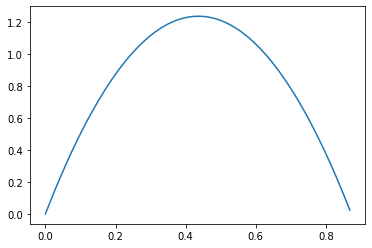

In [ ]:
def V(u,t):
    x,vx, y, vy = u
    dxdt=vx
    dvxdt=0
    dydt=vy
    dvydt=-9.8
    return np.array([dxdt, dvxdt, dydt, dvydt])

def rk4_system (f, u0, t0, tf , n):
  t = np.linspace(t0, tf, n+1)     
  u = np.array((n+1)*[u0])
  h = t[1]-t[0]
  for i in range(n):
    k1 = h * f(u[i], t[i])
    k2 = h * f(u[i] + 0.5 * k1, t[i] + 0.5*h)
    k3 = h * f(u[i] + 0.5 * k2, t[i] + 0.5*h)
    k4 = h * f(u[i] + k3, t[i] + h)
    u[i+1] = u[i] + (k1 + 2*(k2 + k3) + k4) / 6
  return u, t 
x = 0
y = 0
v0 = 5
theta = 80*np.pi/180
vx = v0*np.cos(theta)
vy = v0*np.sin(theta)

u, t= rk4_system (f=V, u0=[x, vx, y, vy], t0=0, tf=1 , n=101)

x = u[:,0]; y = u[:,2]

plt.plot(x, y)
plt.show()


# ODE with Errors

**Exercise 4**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + 2\dfrac{d y}{dx}=30e^{3x} \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=8 , y(a) = 2 
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,H$ (with $H= 0.001$ as default value) and return array of all $x_k$ and $y_k$

In [ ]:
#5pt
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def SODE(a,b,H):
    # initial condition
    y0 = [2,8]
    
    # syst of odes
    def models(y,x):
        y,z = y
        dydx = z
        dzdx = 30*np.exp(3*x)-2*z
        return np.array([dydx,dzdx])

    # time points
    N = int((b-a)/H + 1)
    t = np.linspace(a,b,N)
    u = odeint(models,y0,t)
    return t, u[:,0]
len(t)

2001

2- Solve the second-order differential equation for $a = 0, b = 2$ and plot the solution.

In [ ]:
#4pt
t,ysol = SODE(0,2,0.001)
print(ysol)
# plt.plot(t,ysol)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

[  2.           2.00800702   2.0160281  ... 803.01257515 805.42231756
 807.83929988]


3- The exact solution of the second-order differential equation is $g(x)= 2e^{3x}-e^{-2x}+1$. Plot the absolute value, $\mid y_k - g_k\mid$ against x_k.

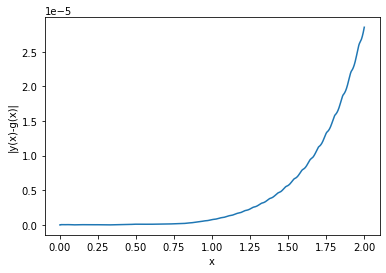

In [ ]:
#3pt
g = 2*np.exp(3*t) - np.exp(-2*t) + 1
e = np.absolute(ysol-g)
# plt.plot(t,ysol,t,g)
plt.plot(t,e)
plt.xlabel('x')
plt.ylabel('|y(x)-g(x)|')
plt.show()

4- Write a Write a function called **L2_error** that takes $a,b,H$ and return the L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_0^N H(y_k - g_k)^2$$

In [ ]:
#3pt
#3pt
def L2_error(a,b,H):
    x,ysol = SODE(a,b,H)
    g = 2*np.exp(3*x) - np.exp(-2*x) + 1
    L2Er = (H*(ysol - g)**2)
    return sum(L2Er)

4- Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

In [ ]:
#3pt
Hj = np.array([10**-1,10**-2,10**-3,10**-4])
L2Erj = []
for i in Hj:
    L2Erj = np.append(L2Erj,L2_error(0,2,i))
print(L2Erj)

#3pt

# #======================== First Method ==================
# a = 0
# b = 2
# H = np.array([10**-1,10**-2,10**-3,10**-4])

# L2Er = np.zeros(4)
# for j  in range(4):
#   L2Er[j] = L2_error(a,b,H[j])

#======================== Second Method ==================
# a = 0
# b = 2
# Vec_L2_error = np.vectorize(lambda H:L2_error(a,b,H))
# H = np.array([10**-1,10**-2,10**-3,10**-4])
# L2Er = Vec_L2_error(H)
# print(L2Er)



# Hj = np.array([10**-1,10**-2,10**-3,10**-4])
# L2Erj = []
# for i in Hj:
#     L2Erj = np.append(L2Erj,L2_error(0,2,i))
# print(L2Erj)

[1.76688197e-10 1.34088211e-10 1.29754197e-10 1.31295082e-10]


5- Plot the array of $L2Er_j$ against the array of $H_j$.

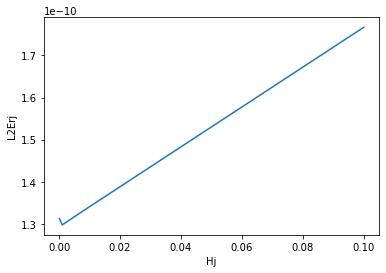

In [ ]:
#3pt
plt.plot(Hj,L2Erj)
plt.xlabel('Hj')
plt.ylabel('L2Erj')
plt.show()

In [ ]:
import numpy as np
x=np.linspace(0,10,11)
x
k=lambda x: x**2
N=12
R=np.diag(k(x+0.5), k=-1)+np.diag(k(x+0.5), k=1)
print(R)
G=-np.eye(N+1,N+1,k=-1)-np.eye(N+1,N+1,k=1)
G
M=R[1:-1,1:-1]
np.shape(np.diag(-(k(x+0.5)+k(x+3/2)), k=0))


[[  0.     0.25   0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.  ]
 [  0.25   0.     2.25   0.     0.     0.     0.     0.     0.     0.
    0.     0.  ]
 [  0.     2.25   0.     6.25   0.     0.     0.     0.     0.     0.
    0.     0.  ]
 [  0.     0.     6.25   0.    12.25   0.     0.     0.     0.     0.
    0.     0.  ]
 [  0.     0.     0.    12.25   0.    20.25   0.     0.     0.     0.
    0.     0.  ]
 [  0.     0.     0.     0.    20.25   0.    30.25   0.     0.     0.
    0.     0.  ]
 [  0.     0.     0.     0.     0.    30.25   0.    42.25   0.     0.
    0.     0.  ]
 [  0.     0.     0.     0.     0.     0.    42.25   0.    56.25   0.
    0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.    56.25   0.    72.25
    0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.    72.25   0.
   90.25   0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.    90.25
    0.   110.25]
 [  0.     0.     0.     0.     0.     

(11, 11)

# Integration

**Exercise 4**

1- Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$

In [ ]:
eq_1=lambda x: (x**3+5*x-20)/(x**2+3)
eq_2=lambda x: (x-1/3)*((x**4-3)**0.5)
print("A= ", quad(eq_1, 0, 2)[0])
print("B=", quad(eq_2, 3, 5)[0])

A=  -7.049316535735796
B= 124.40877284192784


2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.

In [ ]:
def Trap(a, b, f, H=0.001):
  N=int((b-a)/H)
  x=np.linspace(a, b, N+1)
  Z=0
  for i in range(1, N+1):
    Z+=H*((f(x[i-1])+f(x[i]))/2)
  return Z

print("A= ", Trap(a=0, b=2, f=eq_1))
print("B=", Trap(a=3, b=5, f=eq_2))

A=  -7.049316458638298
B= 124.40877672379841


# PDEs

**Exercise 7**

Consider heat conduction in a rod with constant heat conduction properties, $\lambda^2$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\lambda^2\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{\lambda^2}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \lambda, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [ ]:
def  MatGenerator(a,b,lamda,alp,beta,N,g):
    h=(b-a)/N
    R=-np.eye(N+1,N+1,k=-1)+2*np.eye(N+1,N+1,k=0)-np.eye(N+1,N+1,k=1)
    A=(lamda**2/h**2)*R
    x=np.linspace(a,b,N+1)
    B=np.empty((N+1))
    B[0]=g(x[0])+alp*(lamda**2/h**2)
    B[N]=g(x[N])+beta*(lamda**2/h**2)
    for i in range(1,N):
        B[i]=g(x[i-1])

    return A,B,R
np.shape(MatGenerator(0,1,1,-4,0,100,g)[0])


2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, \lambda=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x, $$

and plot the numerical solution

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
g=lambda x: -4*(1+x)*np.exp(x)
A=MatGenerator(0,1,1,-4,0,100,g)[0]
B=MatGenerator(0,1,1,-4,0,100,g)[1]
print(np.shape(A))
print(A)
U=np.linalg.solve(A,B)
# print(U)
# h=0.01
# x=np.arange(0,1+h, h)
# plt.figure(figsize = (5, 3), dpi = 300)
# plt.plot(x,U)
# plt.title('graph of numerical solution of the steady-state heat-conduction problem ')
# plt.xlabel('x')
# plt.ylabel(' numerical solution of U')
# plt.grid()
# plt.show()

# Non-Linear System of Equations

**Exercise 5**
Write a python code to solve the following system of equations
1. \begin{equation}
\begin{cases}
    x^2 + y + x = 4\\
    2e^x + 3y = 14
\end{cases}
\end{equation}

In [ ]:
from scipy.optimize import fsolve

def non_linear_solver (s):
  x,y=s
  F=np.empty([2])
  F[0]=x**2+y+x-4
  F[1]=2*(np.exp(x))+3*y-14
  return F
Guess_val=np.array([0,0])
v=fsolve(non_linear_solver, Guess_val)
print(" x= {} \n y= {}". format(v[0], v[1,])) 
   

# Linear System of Equations

2. 

\begin{equation}
  \begin{cases}
    x - 2y -z +6t= 4\\
    2x + 2y -z - 7t = -4\\
    -x - y +2z + 5t = 5\\
    -3x +4y +2z + 5t = 8\\
  \end{cases}.
\end{equation}

In [ ]:
A = np.array([1, -2, -1, 6, 2, 2, -1, -7, -1, -1, 2, 5, -3, 4, 2, 5]).reshape(4,-1)
b = np.array([4, -4, 5, 8]).reshape(4,-1)
z = np.linalg.solve(A,b)
print(" x= {} \n y= {} \n z= {} \n t= {} \n". format(z[0], z[1,], z[2,], z[3,])) 



# Pandas

In [ ]:
import numpy as np
import pandas as pd

# 1. Data Structure
## 1.1 <b> Pandas Series </b>
- A 1-dimensional labeled array
- Supports many data types
- Axis labels $\rightarrow$ index (get and set values by index label)
- Valid argument to most NumPy
methods

In [ ]:
data0 = pd.Series(data = [1,2,3.,4,5,6,7,8])
data0

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
dtype: float64

In [ ]:
#data1 = pd.Series(data = [1,2,3.,4,5,6,7,8], index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
data1 = pd.Series(data = [1,2,3.,4,5,6,7,8,9], index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','a'])
data1

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
g    7.0
h    8.0
a    9.0
dtype: float64

In [ ]:
data1.index
data1[4]
data1[[2,4,5]]
data1['a']
# 'a' in data1
# data1*3
# data1**3
# data1/2
# data1

a    1.0
a    9.0
dtype: float64

##  1.2. <b>DataFrame </b>
- A 2-dimensional labeled data
structure
- A dictionary of Series objects
    - Columns can be of potentially
different types
- Optionally parameters for fine-tuning:
    - index (row labels)
    - columns (column labels)

Pandas provides many constructors to create DataFrames!

In [ ]:
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
data2

,GradeS1,GradeS2
Art,50.0,NaN
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0
Maths,70.0,90.0
Physics,98.0,88.0
Sport,67.0,NaN
chemistry,NaN,78.0


In [ ]:
data2.index
data2.columns

Index(['GradeS1', 'GradeS2'], dtype='object')

In [ ]:
d= pd.DataFrame(data2,index=['Maths', 'Physics','Economics'])#Create another data frame with some index of data2
d

,GradeS1,GradeS2
Maths,70.0,90.0
Physics,98.0,88.0
Economics,NaN,76.0


In [ ]:
d= pd.DataFrame(data2,index=['Maths', 'Physics','Economics', 'elvira'], 
                columns= ('Grade12', 'GradeS2','GradeS1'))
d

,Grade12,GradeS2,GradeS1
Maths,NaN,90.0,70.0
Physics,NaN,88.0,98.0
Economics,NaN,76.0,NaN
elvira,NaN,NaN,NaN


# 2. Reading and Writing Data

## 2.1 <b> pandas: Data Ingestion (Reading) </b>
- Functions such as <font color = red> ‘read_excel’, ‘read_csv’, 'read_json', 'read_html', 'read_sql_query', 'read_sql_table' </b>, etc.

<b> Syntax: pandas.function(file_directory) </b>

In [ ]:
ddat = pd.read_excel('Climate_Dynamics.xlsx')
ddat
ddat.head()
ddat.head(3)
ddat.tail()

,Unnamed: 0,Quiz 1,Unnamed: 2,Quiz 2,Unnamed: 4,Bonus,Assignment 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Assignment 2,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Extended Quiz,Final Mark,Grade,Unnamed: 18
29,Remy Twiringiyimana,8.0,80,8.0,80,3.0,9.5,28.5,54.0,92,18.0,20.0,28.0,28.0,96,92.0,90.8,Distinction,Remy Twiringiyimana
30,Romain Akpahou,8.0,80,8.0,80,10.0,9.5,29.0,55.0,93.5,20.0,20.0,17.0,30.0,91,90.0,89.35,Distinction,Romain Akpahou
31,Yao Gahounzo,6.0,60,6.0,60,10.0,9.5,29.0,55.0,93.5,15.0,20.0,28.0,30.0,97,86.0,86.35,Distinction,Yao Gahounzo
32,Zeinab Hesham Abd El-ghany,9.0,90,9.0,90,17.0,9.5,29.0,56.0,94.5,20.0,20.0,17.0,30.0,91,77.0,89.05,Distinction,Zeinab Hesham Abd El-ghany
33,Titus,7.0,70,7.0,70,22.0,10.0,29.5,56.0,95.5,15.0,20.0,17.0,30.0,91,89.0,87.75,Distinction,Titus


In [ ]:
ddatt = pd.ExcelFile('DefenseSchedule2020forTutors.xlsx')
sheet1_df = pd.read_excel(ddatt, 'For Examiners ')
sheet2_df = pd.read_excel(ddatt, 'For Tutors ')
sheet1_df.head(2)
# sheet2_df.head(3)

,Unnamed: 0,Wednesday 3rd June,Examiner,Thursday 4th June,Unnamed: 4,Friday 5th June,Unnamed: 6,Unnamed: 7,Monday 8th June,Unnamed: 9,Tuesday 9th June,Unnamed: 11,Wednesday 10th June,Unnamed: 13
0,09:00:00,Angela Nyangate John,Patrice Takam,Yao Gahounzo,Stive,NaN,NaN,NaN,Patrick Pam Peter,Hove,Zeinab,Bourgeois,Leontine,Bemsibom
1,09:30:00,Mohamed Maysara Hassan Yagob,Antoine Bogso,Martin De Pores Barindirimana,Denis Ndanguza,Mulengo Kanzoka,Lydie (UR),NaN,Remy Mugenda Ineza,Hove,Dimitri,Erick Tetsadjio,Jean de Dieu,Bamba


In [ ]:
df = pd.read_json("https://data.smcgov.org/resource/mb6a-xn89.json")#JavaScript Object Notation
df.head()

,geography,geography_type,year,less_than_high_school_graduate,high_school_graduate,some_college_or_associate_s_degree,bachelor_s_degree_or_higher,location_1,:@computed_region_uph5_8hpn,:@computed_region_i2t2_cryp
0,Atherton,Town,2014-01-01T00:00:00.000,13.6,12.3,2.7,3.5,"{'type': 'Point', 'coordinates': [-122.2, 37.4...",2.0,28596
1,Colma,Town,2014-01-01T00:00:00.000,6.3,6.4,10.4,2.4,"{'type': 'Point', 'coordinates': [-122.455556,...",4.0,28588
2,Foster City,City,2014-01-01T00:00:00.000,11.9,9.7,2.0,2.9,"{'type': 'Point', 'coordinates': [-122.266389,...",6.0,319
3,Portola Valley,Town,2014-01-01T00:00:00.000,48.1,0.0,0.0,1.8,"{'type': 'Point', 'coordinates': [-122.218611,...",14.0,28597
4,Redwood City,City,2014-01-01T00:00:00.000,16.4,10.6,6.6,3.0,"{'type': 'Point', 'coordinates': [-122.236111,...",21.0,28607


In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
data.head()

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


## 2.2. Data writing

Save the dataframe in the current directory

In [ ]:
#create a dataframe
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
#==========================================
# index = False parameter will not write the index values, default is True
#data2.to_csv('data_new.csv', index=True)
#data2.to_csv('data_new.txt', sep='\t', index=True)
# data2.to_excel('data_new.xlsx',sheet_name='Sheet1', index = False)
data2.head()

,GradeS1,GradeS2
Art,50.0,NaN
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0


<b>Create a folder in the current directory and save the dataframe inside</b>

In [ ]:
#==============================================
# create a folder if it not exists
Name_of_folder = 'folder 1'
import os
if not os.path.exists(Name_of_folder):
    os.makedirs(Name_of_folder)
#==============================================
# index = False parameter will not write the index values, default is True
data2.to_csv(Name_of_folder+'/data_new.csv', index=False)
# data2.to_csv(Name_of_folder+'/mtcars_new.txt', sep='\t', index=False)
# data2.to_excel(Name_of_folder+'/mtcars_new.xlsx',sheet_name='Sheet1', index = False)

In [ ]:
data1

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
g    7.0
h    8.0
a    9.0
dtype: float64

# 3. Basic Statistics Summary
<b> pandas in Descriptive Statistics </b>
Functions such as 'describe()', 'corr()', 'min()', 'max()', 'mode()', 'median()', 'std()', etc.

<b> Syntax : data_frame.function() </b>

In [ ]:
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = ["Pass","Pass","Pass","Pass","Pass","Pass","Fail"], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
print(data2)
data2.describe()

           GradeS1 GradeS2
Art           50.0     NaN
Biology       84.0    Pass
Economics      NaN    Pass
Finance        NaN    Pass
Geology        NaN    Fail
Maths         70.0    Pass
Physics       98.0    Pass
Sport         67.0     NaN
chemistry      NaN    Pass


,GradeS1
count,5.000000
mean,73.800000
std,18.143869
min,50.000000
25%,67.000000
50%,70.000000
75%,84.000000
max,98.000000


In [ ]:
#create a dataframe
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
print(data2)
data2.describe()

           GradeS1  GradeS2
Art           50.0      NaN
Biology       84.0     70.0
Economics      NaN     76.0
Finance        NaN     77.0
Geology        NaN     87.0
Maths         70.0     90.0
Physics       98.0     88.0
Sport         67.0      NaN
chemistry      NaN     78.0


,GradeS1,GradeS2
count,5.000000,7.000000
mean,73.800000,80.857143
std,18.143869,7.492854
min,50.000000,70.000000
25%,67.000000,76.500000
50%,70.000000,78.000000
75%,84.000000,87.500000
max,98.000000,90.000000


In [ ]:
data2

,GradeS1,GradeS2
Art,50.0,NaN
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0
Maths,70.0,90.0
Physics,98.0,88.0
Sport,67.0,NaN
chemistry,NaN,78.0


In [ ]:
data2.describe()

,GradeS1,GradeS2
count,5.000000,7.000000
mean,73.800000,80.857143
std,18.143869,7.492854
min,50.000000,70.000000
25%,67.000000,76.500000
50%,70.000000,78.000000
75%,84.000000,87.500000
max,98.000000,90.000000


In [ ]:
data2.loc['Maths',:].describe()

count     2.000000
mean     80.000000
std      14.142136
min      70.000000
25%      75.000000
50%      80.000000
75%      85.000000
max      90.000000
Name: Maths, dtype: float64

In [ ]:
data2.corr()

,GradeS1,GradeS2
GradeS1,1.000000,-0.090784
GradeS2,-0.090784,1.000000


In [ ]:
data2.max()
data2.loc['Maths',:].max()

90.0

In [ ]:
data2.cov()

,GradeS1,GradeS2
GradeS1,329.2,-14.000000
GradeS2,-14.0,56.142857


In [ ]:
data2.std()

GradeS1    18.143869
GradeS2     7.492854
dtype: float64

In [ ]:
data2.mean()

GradeS1    73.800000
GradeS2    80.857143
dtype: float64

# 4. Viewing Data

In [ ]:
dic = {'Col1':[1, -2, 3, 1, 5, 6, 1, -3, 1, 1],
      'Col2': [4, -3 , 7, 8, 9, 5, 6, 4, -2, 2],
      'Col3': ['Euler', 'A', 'A', 'Euler', 'A', 'A', 'RK4', 'A', 'Euler', 'RK4']}

df = pd.DataFrame(dic, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
df

,Col1,Col2,Col3
a,1,4,Euler
b,-2,-3,A
c,3,7,A
d,1,8,Euler
e,5,9,A
f,6,5,A
g,1,6,RK4
h,-3,4,A
i,1,-2,Euler
j,1,2,RK4


## 4.1 The characteristics of a dataframe

In [ ]:
df.columns       #Get column names 
df.index         # Get dataframe index 
df.values        # Get values
df.dtypes        # Get column datatypes
df.shape



(10, 3)

## 4.2 Access, slice and update the values of a dataframe
To access, slice or update the value of a dataframe one can use the methods <b>loc or iloc</b>.

<b>loc</b> gets rows (or columns) with particular labels from the index. <b>iloc</b> gets rows (or columns) at particular positions in the index (so it only takes integers). 
### 4.2.1 Selecting pandas data using “iloc”

The <b>iloc</b> indexer for Pandas Dataframe is used for <b>integer-location based indexing / selection by position</b>.

The iloc indexer syntax is 
$$\text{data.iloc[<row selection>, <column selection>]},$$ 

which is sure to be a source of confusion for R users. <b>iloc</b> in pandas is used to select rows and columns by number, in the order that they appear in the data frame. You can imagine that each row has a row number from 0 to the total rows (<b>data.shape[0]</b>)  and <b>iloc[...]</b> allows selections based on these numbers. The same applies for columns (ranging from 0 to <b>data.shape[1]</b>)

There are two “arguments” to iloc – a row selector, and a column selector.  For example:

In [ ]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
data.head()

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


In [ ]:
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
data.head()

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,969
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,207
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,824
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,772
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


In [ ]:
# # # Single selections using iloc and DataFrame
# # # Rows:
data.iloc[0] # first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output.
data.iloc[1] # second row of data frame (Evan Zigomalas)
data.iloc[-1] # last row of data frame (Mi Richan)
# # # Columns:
data.iloc[:,0] # first column of data frame (first_name)
# data.iloc[:,1] # second column of data frame (last_name)
data.iloc[:,-1] # last column of data frame (id)

0      969
1      207
2      824
3      772
4       48
      ... 
495    188
496     86
497    584
498    548
499     74
Name: id, Length: 500, dtype: int64

<b>Note that .iloc returns a Pandas Series when one row is selected, and a Pandas DataFrame when multiple rows are selected, or if any column in full is selected. To counter this, pass a single-valued list if you require DataFrame output.</b>


In [ ]:
data.iloc[:,[-1]] # last column of data frame (id)

,id
0,969
1,207
2,824
3,772
4,48
...,...
495,188
496,86
497,584
498,548


Multiple columns and rows can be selected together using the <b>.iloc</b> indexer.

In [ ]:
# # Multiple row and column selections using iloc and DataFrame
data.iloc[0:5] # first five rows of dataframe
data.iloc[:, 0:2] # first two columns of data frame with all rows
data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1).


,county,postal,phone1
0,Kent,CT2 7PP,01835-703597
1,Buckinghamshire,HP11 2AX,01937-864715
2,Bournemouth,BH6 3BE,01347-368222
3,Lincolnshire,DN36 5RP,01912-771311
4,West Midlands,B70 9DT,01547-429341


### 4.2.2. Selecting pandas data using “loc”

The Pandas loc indexer can be used with DataFrames for two different use cases:

    - Selecting rows by label/index
    - Selecting rows with a boolean / conditional lookup
The loc indexer is used with the same syntax as iloc: 
$$\text{data.loc[<row selection>, <column selection>]}$$

#### a. Label-based / Index-based indexing using .loc

Selections using the loc method are based on the index of the data frame (if any). Where the index is set on a DataFrame, using <b>df.set_index()</b>, the .loc method directly selects based on index values of any rows. For example, setting the index of our test data frame to the persons “last_name”:

In [ ]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
data.head()

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


In [ ]:
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
data.index

RangeIndex(start=0, stop=500, step=1)

In [ ]:
data1 = data.set_index("last_name", inplace=False)#set the column "last_name" as the index of our dataframe
data1.head()

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Tomkiewicz,Aleshia,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,969
Zigomalas,Evan,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,207
Andrade,France,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,824
Mcwalters,Ulysses,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,772
Veness,Tyisha,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


In [ ]:
data1.index

Index(['Tomkiewicz', 'Zigomalas', 'Andrade', 'Mcwalters', 'Veness', 'Rampy',
       'Grasmick', 'Hisaw', 'Manzella', 'Klapec',
       ...
       'Ausdemore', 'Stancil', 'Fiorino', 'Manciel', 'Katie', 'Veit',
       'Euresti', 'Brenning', 'Keeny', 'Richan'],
      dtype='object', name='last_name', length=500)

Now with the index set, we can directly select rows for different “last_name” values using <b>.loc[<label>]</b>  – either singly, or in multiples. For example:

In [ ]:
data1.loc['Veness']
# data1.loc[['Andrade','Veness']]

first_name                              Tyisha
company_name                    Champagne Room
address                      5396 Forth Street
city                Greets Green and Lyng Ward
county                           West Midlands
postal                                 B70 9DT
phone1                            01547-429341
phone2                            01290-367248
email                tyisha.veness@hotmail.com
web             http://www.champagneroom.co.uk
id                                          48
Name: Veness, dtype: object

<b> Selecting single or multiple rows using .loc index selections with pandas. Note that the first example returns a series, and the second returns a DataFrame. You can achieve a single-column DataFrame by passing a single-element list to the .loc operation.</b>

In [ ]:
data1.loc[['Veness']]

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Veness,Tyisha,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


Select columns with <b>.loc</b> using the names of the columns.

In [ ]:
data1.loc[['Andrade','Veness'], ['first_name','address','city']]

,first_name,address,city
last_name,,,
Andrade,France,8 Moor Place,East Southbourne and Tuckton W
Veness,Tyisha,5396 Forth Street,Greets Green and Lyng Ward


When using the .loc indexer, columns are referred to by names using lists of strings, or “:” slices.

You can select ranges of index labels – the selection <b>data.loc['Bruch':'Julio']</b> will return all rows in the data frame between the index entries for <b>'Bruch'</b> and <b>'Julio'</b>. The following examples should now make sense:

In [ ]:
# Select rows with index values 'Andrade' and 'Veness', with all columns between 'city' and 'email'
data1.loc[['Andrade', 'Veness'], 'city':'email']
# # # Select all rows between 'Andrade' and 'Veness', with just 'first_name', 'address' and 'city' columns
data1.loc['Andrade':'Veness', ['first_name', 'address', 'city']]
# # # Select all rows between 'Andrade' and 'Veness', with all columns between 'city' and 'email' 
data1.loc['Andrade':'Veness', 'city':'email']

,city,county,postal,phone1,phone2,email
last_name,,,,,,
Andrade,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com
Mcwalters,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com
Veness,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com


Note that in the last example, <b>data.loc[207]</b> (the row with index value 207) is not equal to <b>data.iloc[207]</b> (the 207th row in the data)

In [ ]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
# Change the index to be based on the 'id' column
data.set_index('id', inplace=True)
print(data.shape)
data.index.unique().shape
data.head()

(500, 11)


,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
969,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
207,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
824,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
772,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
48,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


In [ ]:
i = data.index[1]
print('i = ',i)
#select the row with 'id' = i
data.loc[[i]]

i =  207


,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
207,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
207,Eva,Joulwan,Central Hrdwr & Elec Corp,7 Lear Rd,Stroud,Hampshire,GU32 3PQ,01779-720349,01961-802899,eva.joulwan@gmail.com,http://www.centralhrdwreleccorp.co.uk
207,Allene,Burau,Allied Plastics,8 Barlow St #6,Barlow,Derbyshire,S18 7TH,01731-825958,01260-963065,allene.burau@hotmail.com,http://www.alliedplastics.co.uk


In [ ]:
i = data.index[1]
b= data.index[2]
print('i = ',i)
#select the row with 'id' = i
data.loc[[i:b]]#error because of the label i is not unique

SyntaxError: invalid syntax (Temp/ipykernel_4032/2634612698.py, line 5)

In [ ]:
print(i)
data.iloc[[i]]#return the row of index 207.

207


,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
876,Madalyn,Dubberly,L & M Industrial Chemicals Inc,1 Lower Burlington St,Northfleet South Ward,Kent,DA11 8RN,01974-720949,01910-745476,madalyn.dubberly@gmail.com,http://www.lmindustrialchemicalsinc.co.uk


### b. Boolean / Logical indexing using .loc

Conditional selections with boolean arrays using $\text{data.loc[<selection>]}$ is the most common method that I use with Pandas DataFrames. With boolean indexing or logical selection, you pass an array or Series of True/False values to the <b>.loc</b> indexer to select the rows where your Series has True values.

In most use cases, you will make selections based on the values of different columns in your data set.

For example, the statement $$\text{data[‘first_name’] == ‘Antonio’}$$ produces a Pandas Series with a True/False value for every row in the ‘data’ DataFrame, where there are “True” values for the rows where the first_name is “Antonio”. These type of boolean arrays can be passed directly to the <b>.loc</b> indexer as so:

In [ ]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
# data.set_index("last_name", inplace=True)

# data.loc[data['first_name'] == 'Antonio']

# data.loc[data["county"]=="Newport"]
data.loc[:,["county"]]

,county
0,Kent
1,Buckinghamshire
2,Bournemouth
3,Lincolnshire
4,West Midlands
...,...
495,Greater London
496,Highland
497,South Yorkshire
498,County Durham


In [ ]:
#command line to extract the column "county" from the dataframe data.
data.county
data["county"]
data.loc[:,"county"]
data.loc[:,["county"]]

,county
0,Kent
1,Buckinghamshire
2,Bournemouth
3,Lincolnshire
4,West Midlands
...,...
495,Greater London
496,Highland
497,South Yorkshire
498,County Durham


In [ ]:
data.county.unique().size

102

As before, a second argument can be passed to .loc to select particular columns out of the data frame. Again, columns are referred to by name for the loc indexer and can be a single string, a list of columns, or a slice “:” operation.

In [ ]:
data.loc[data['first_name'] == 'Antonio', ['email', 'address','city']]

,email,address,city
272,antonio.villamarin@gmail.com,353 Standish St #8264,Little Parndon and Hare Street
285,antonio_glasford@glasford.co.uk,425 Howley St,Gaer Community
427,antonio.heilig@gmail.com,35 Elton St #3,Ipplepen


Note that when selecting columns, if one column only is selected, the .loc operator returns a Series. For a single column DataFrame, use a one-element list to keep the DataFrame format, for example:

In [ ]:
data.loc[data['first_name'] == 'Antonio', 'email']
data.loc[data['first_name'] == 'Antonio', ['email']]

,email
272,antonio.villamarin@gmail.com
285,antonio_glasford@glasford.co.uk
427,antonio.heilig@gmail.com


# 5. Basic Operations

## 5.1 Sorting values in the DataFrame

In [ ]:
dic = {'Col1':[1, -2, 3, 1, 5, 6, 1, -3, 1, 1],
      'Col2': [4, -3 , 7, 8, 9, 5, 6, 4, -2, 2],
      'Col3': ['Euler', 'A', 'A', 'Euler', 'A', 'A', 'RK4', 'A', 'Euler', 'RK4']}

df = pd.DataFrame(dic, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

# #=============================================================
# #Create a new columns called 'X' and 'Y' in the dataframe df
df['X'] = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
df['Y'] = ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
# #============================================================
# df
df.loc['z'] = [1,2,3,4,5]
# #df

df


,Col1,Col2,Col3,X,Y
a,1,4,Euler,A,A
b,-2,-3,A,A,B
c,3,7,A,A,A
d,1,8,Euler,A,B
e,5,9,A,A,A
f,6,5,A,B,B
g,1,6,RK4,B,A
h,-3,4,A,B,B
i,1,-2,Euler,B,A
j,1,2,RK4,B,B


In [ ]:
df.sort_values(by =['Col1'],ascending=[True], inplace=True)# Sort DataFrame 
df.sort_values(by =['Col1', 'Col2'],ascending=[False,False], inplace=True)# Sort DataFrame
df

,Col1,Col2,Col3,X,Y
f,6,5,A,B,B
e,5,9,A,A,A
c,3,7,A,A,A
d,1,8,Euler,A,B
g,1,6,RK4,B,A
a,1,4,Euler,A,A
j,1,2,RK4,B,B
z,1,2,3,4,5
i,1,-2,Euler,B,A
b,-2,-3,A,A,B


## 5.2. Replace NaN Values in Pandas DataFrame

Depending on the scenario, you may use either of the 4 methods below in order to replace NaN values with zeros in Pandas DataFrame:

let us consider the following dataframe

In [ ]:
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology']),
        'GradeS3': pd.Series(data = [69,75,73,87], 
                              index = ['Maths', 'chemistry', 'Economics', 'Geology']),
        'GradeS4': pd.Series(data = [90,70,88,78,76,77,87,98,90], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology','Art', 'Sport'])}
data2 = pd.DataFrame(data2)
data2

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,NaN,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,NaN,NaN,90
chemistry,NaN,78.0,75.0,78


1. For a single column or entire datafame using NumPy: 

In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 30 in the column 'GradeS2' of the dataframe using numpy
data3['GradeS2'].replace(np.nan,30, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,30.0,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,30.0,NaN,90
chemistry,NaN,78.0,75.0,78


In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the entire dataframe using numpy
data3.replace(np.nan,30, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,30.0,30.0,98
Biology,84.0,70.0,30.0,70
Economics,30.0,76.0,73.0,76
Finance,30.0,77.0,30.0,77
Geology,30.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,30.0,88
Sport,67.0,30.0,30.0,90
chemistry,30.0,78.0,75.0,78


2. For a single column or entire datafame using Pandas: 

In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the column 'GradeS2' using Pandas
data3['GradeS2'].fillna(30, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,30.0,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,30.0,NaN,90
chemistry,NaN,78.0,75.0,78


In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the entire dataframe using Pandas
data3.fillna(3, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,3.0,3.0,98
Biology,84.0,70.0,3.0,70
Economics,3.0,76.0,73.0,76
Finance,3.0,77.0,3.0,77
Geology,3.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,3.0,88
Sport,67.0,3.0,3.0,90
chemistry,3.0,78.0,75.0,78


Replace missing values with last valid observation (useful in time series
data). For example, temperature does not change drastically compared to previous observation. So better approach is to fill NA is to forward or backward fill. There are mainly two methods available

In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by next value in the column 'GradeS1' of the dataframe using Pandas
data3['GradeS1'].fillna(method= 'bfill', inplace=True)
##Note that the last NaN was not replaced because there is no next value for him


##Replace NaN by next value in the column 'GradeS1' of the dataframe using Pandas
data3.fillna(method= 'bfill', inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,70.0,73.0,98
Biology,84.0,70.0,73.0,70
Economics,70.0,76.0,73.0,76
Finance,70.0,77.0,87.0,77
Geology,70.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,75.0,88
Sport,67.0,78.0,75.0,90
chemistry,NaN,78.0,75.0,78


In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by previous value in the column 'GradeS2' of the dataframe using Pandas
data3['GradeS2'].fillna(method= 'ffill', inplace=True)
##Note that the first NaN was not replaced because there is no next value for him


##Replace NaN by previous value in the entire dataframe using Pandas
data3.fillna(method= 'ffill', inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,NaN,NaN,98
Biology,84.0,70.0,NaN,70
Economics,84.0,76.0,73.0,76
Finance,84.0,77.0,73.0,77
Geology,84.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,69.0,88
Sport,67.0,88.0,69.0,90
chemistry,67.0,78.0,75.0,78


## 5.3. Delete NaN Values with Zeros in Pandas DataFrame

In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Delete all rows that contain NaN
data3.dropna(axis=0, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Maths,70.0,90.0,69.0,90


In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Delete all columns that contain NaN
data3.dropna(axis=1, inplace=True)
data3

,GradeS4
Art,98
Biology,70
Economics,76
Finance,77
Geology,87
Maths,90
Physics,88
Sport,90
chemistry,78


## 5.4. Grouping
Grouping involves one or more of the following steps:
- Splitting the data into groups based on some criteria,
- Applying a function to each group independently,
- Combining the results into a data structure

Let us consider the following data

In [ ]:
df = pd.DataFrame({'Name' : ['jack', 'jane', 'jack', 'jane', 'jack', 'jane','jack', 'jane'],
                   'State' : ['SFO', 'SFO', 'NYK', 'CA', 'NYK', 'NYK','SFO', 'CA'],
                   'Grade':['A','A','B','A','C','B','C','A'],
                   'Age' : np.random.randint(24, 50, size=8)})
df

,Name,State,Grade,Age
0,jack,SFO,A,36
1,jane,SFO,A,49
2,jack,NYK,B,35
3,jane,CA,A,48
4,jack,NYK,C,38
5,jane,NYK,B,29
6,jack,SFO,C,30
7,jane,CA,A,27


Find max age by Name / State

In [ ]:
df.groupby(['Name','State']).max()

Grade  Age
Name State           
jack NYK       C   38
     SFO       C   36
jane CA        A   48
     NYK       B   29
     SFO       A   49

# 6. Load datasets from seaborn

The library seaborn gives you a sample of datasets to practice

In [ ]:
import seaborn as sns
print(sns.get_dataset_names())


In [ ]:
tips = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
cars = sns.load_dataset("car_crashes")

# 6. Plot of a dataframe

In [ ]:
import pandas as pd

download_url = ("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv")

df = pd.read_csv(download_url)
df.head()

Your dataset contains some columns related to the earnings of graduates in each major:

- "Median" is the median earnings of full-time, year-round workers.
- "P25th" is the 25th percentile of earnings.
- "P75th" is the 75th percentile of earnings.
- "Rank" is the major’s rank by median earnings.

Let’s start with a plot displaying these columns. First, you need to set up your Jupyter Notebook to display plots with the **%matplotlib inline** magic command.

In [ ]:
%matplotlib inline  

In [ ]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"]);

To discover these differences, you’ll use several other types of plots.

.plot() has several optional parameters. Most notably, the **kind** parameter accepts eleven different string values and determines which kind of plot you’ll create:

- "area" is for area plots.
- "bar" is for vertical bar charts.
- "barh" is for horizontal bar charts.
- "box" is for box plots.
- "hexbin" is for hexbin plots.
- "hist" is for histograms.
- "kde" is for kernel density estimate charts.
- "density" is an alias for "kde".
- "line" is for line graphs.
- "pie" is for pie charts.
- "scatter" is for scatter plots.

The default value is "line". 

In [ ]:
df.plot.scatter?

You can use both pyplot.plot() and df.plot() to produce the same graph from columns of a DataFrame object. However, if you already have a DataFrame instance, then df.plot() offers cleaner syntax than pyplot.plot().

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df["Rank"], df["P75th"]);

In [ ]:
df.plot(x="Rank", y="P75th")

# Pandas Nadine

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
titanic_df = sns.load_dataset("titanic")

In [ ]:
print(titanic_df.shape)
print(titanic_df.info())
titanic_df.head()

(712, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 69.0+ KB
None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
titanic_df.isnull().sum()# rturns number of mising values in each column

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
titanic_df.drop(columns=['deck'], inplace=True)#drops the column and makes changes in the original data

In [ ]:
titanic_df.dropna(axis=0, inplace=True)#drops raws containihg nul 

In [ ]:
titanic_df.shape

(712, 14)

In [ ]:
titanic_df.groupby(by=["survived", "sex"]).count().iloc[2,0]

195

In [ ]:
titanic_df.groupby(by=["sex", "survived"])["age"].mean()[2]

31.618055555555557

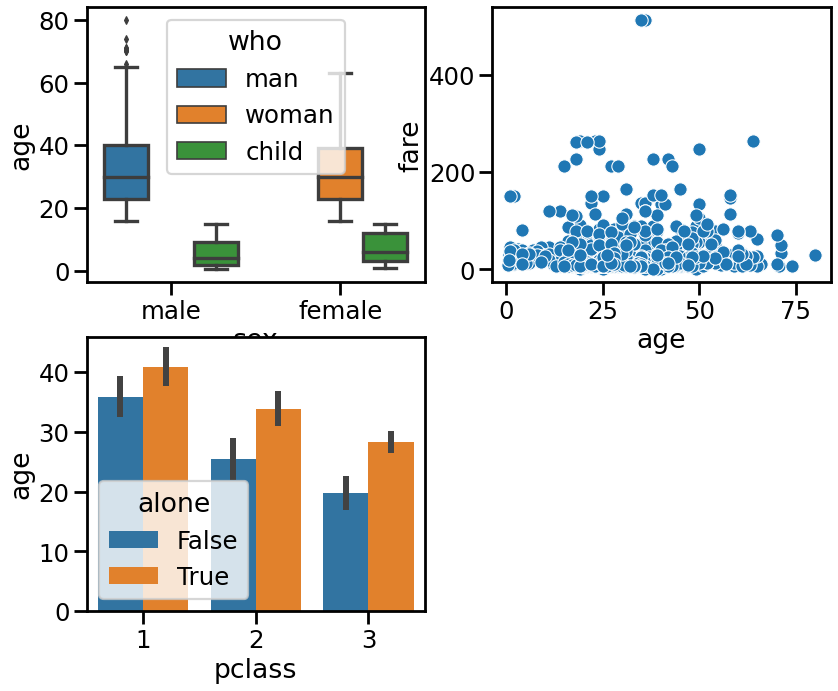

In [ ]:
plt.figure(figsize=(12, 10), dpi=80)
plt.subplot(2,2,1)
sns.boxplot(x="sex", y="age", hue="who", data=titanic_df)

plt.subplot(2,2,2)
sns.scatterplot(x="age", y="fare", data=titanic_df)

plt.subplot(2,2,3)
sns.barplot(x="pclass", y="age", hue="alone", data=titanic_df)

plt.show()

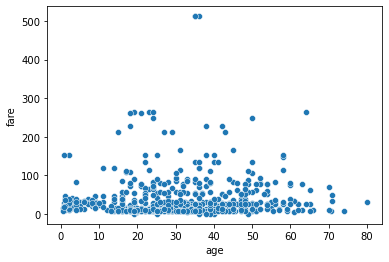

In [ ]:
sns.scatterplot(x="age", y="fare", data=titanic_df);

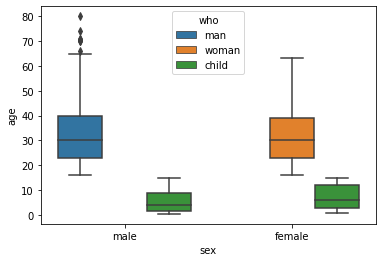

In [ ]:
sns.boxplot(x="sex", y="age", hue="who", data=titanic_df);

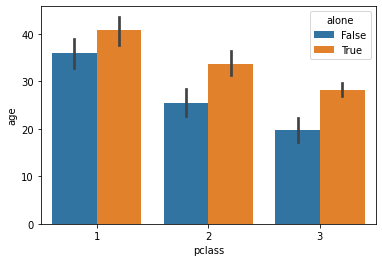

In [ ]:
sns.barplot(x="pclass", y="age", hue="alone", data=titanic_df);

In [ ]:
# set context of seaborn theme to poster 
sns.set_context("poster")

In [ ]:
# load the diamonds dataset from seaborn package
DMD= sns.load_dataset('diamonds')
DMD.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
print(DMD.shape)
print(DMD.info())

(53940, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


In [ ]:
# how many columns in this dataset? 
len(DMD.columns)

10

In [ ]:
# list the names of all columns and describe the datatype of each column? 
for clmn in DMD.columns:
    print((clmn,DMD[clmn].dtype))

('carat', dtype('float64'))
('cut', CategoricalDtype(categories=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], ordered=False))
('color', CategoricalDtype(categories=['D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=False))
('clarity', CategoricalDtype(categories=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], ordered=False))
('depth', dtype('float64'))
('table', dtype('float64'))
('price', dtype('int64'))
('x', dtype('float64'))
('y', dtype('float64'))
('z', dtype('float64'))


In [ ]:
# list the unique number of diamond colors in this dataset? 
DMD['color'].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [ ]:
#  what is the minimum depth of diamond?
DMD['depth'].min()

43.0

In [ ]:
DMD.groupby(by=['clarity','cut']).count().iloc[:,0]

clarity  cut      
IF       Ideal        1212
         Premium       230
         Very Good     268
         Good           71
         Fair            9
VVS1     Ideal        2047
         Premium       616
         Very Good     789
         Good          186
         Fair           17
VVS2     Ideal        2606
         Premium       870
         Very Good    1235
         Good          286
         Fair           69
VS1      Ideal        3589
         Premium      1989
         Very Good    1775
         Good          648
         Fair          170
VS2      Ideal        5071
         Premium      3357
         Very Good    2591
         Good          978
         Fair          261
SI1      Ideal        4282
         Premium      3575
         Very Good    3240
         Good         1560
         Fair          408
SI2      Ideal        2598
         Premium      2949
         Very Good    2100
         Good         1081
         Fair          466
I1       Ideal         146
         

In [ ]:
# list the color, clarity, and prices of the most expensive diamond? 
most_exp= DMD['price'].max()
DMD[DMD['price']==most_exp][['color','clarity','price']]

,color,clarity,price
27749,I,VS2,18823


<AxesSubplot:xlabel='x', ylabel='price'>

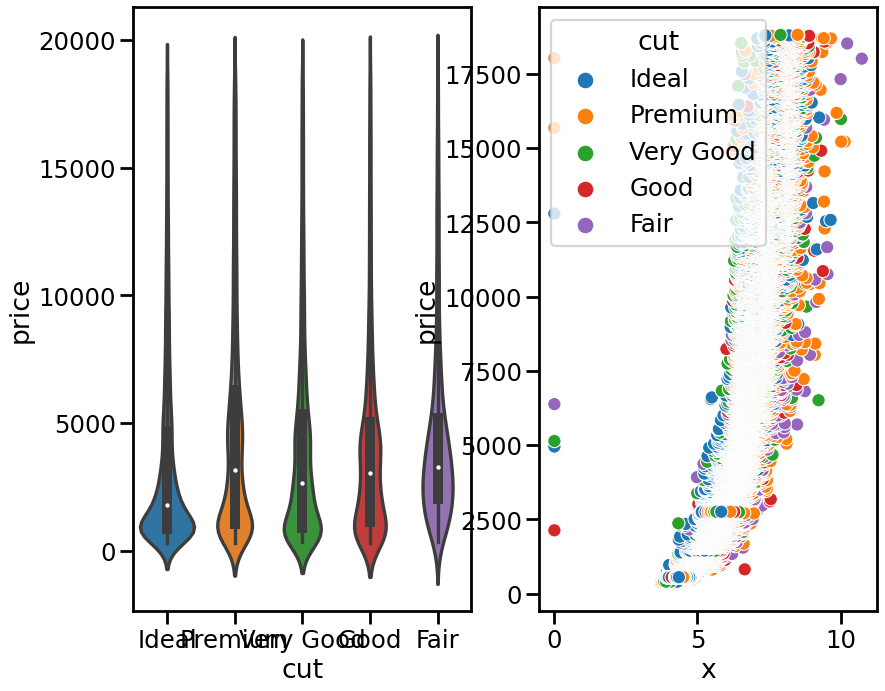

In [ ]:
plt.figure(figsize=(12, 10), dpi=80)
plt.subplot(1,2,1)
sns.violinplot(x='cut',y='price',data=DMD)
plt.subplot(1,2,2)
sns.scatterplot(x='x',y='price',hue='cut',data=DMD)

# Visualization with Seaborn in Python

## Seaborn Tutorial

Seaborn is a data visualization library built on top of Matplotlib. It is often used because it makes attractive visualizations and works easily with Pandas. While in Matplotlib you often have to write multiple lines of code to create a plot Seaborn makes assumptions on what you want which often translates into getting the same plot with 1 line of code.

### Installing with pip <br>
`pip install seaborn`

### Installing with conda <br>
`conda install seaborn`

### import

In [ ]:
pwd

'C:\\Users\\HOVE\\Desktop\\Vizualization'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Import Data

In [ ]:
# You can import custom data
cs_df = pd.read_csv('ComputerSales.csv')

# Seaborn provides built in datasets
print(sns.get_dataset_names())

# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
cs_df

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,Michelle Samms,F,46,NY,17-BY3613DX,Laptop,609.99,140.34,Flyer 3,November,2019
98,99,Mick Roberts,M,23,PA,BB980,Desktop,889.99,110.89,Flyer 2,May,2019
99,100,Ed Klondike,M,52,OH,15M-ED0023DX,Laptop,989.99,111.34,Email,November,2019
100,101,Moe Eggert,M,35,PA,GMA4000BST,Desktop,589.99,138.64,Website,May,2019


In [ ]:
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Distribution Plots

### Distribution Plot

<AxesSubplot:xlabel='not_distracted', ylabel='Density'>

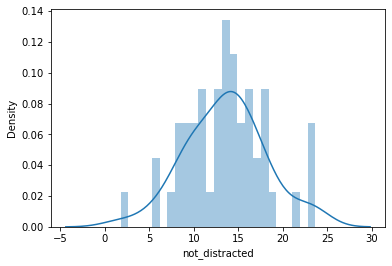

In [ ]:
# Provides a way to look at a univariate distribution. A 
# univariate distribution provides a distribution for one variable
# Kernal Density Estimation with a Histogram is provided
# kde=False removes the KDE
# Bins define how many buckets to divide the data up into between intervals
# For example put all profits between $10 and $20 in this bucket
sns.distplot(crash_df['not_distracted'], kde=True, bins=25)

### Joint Plot

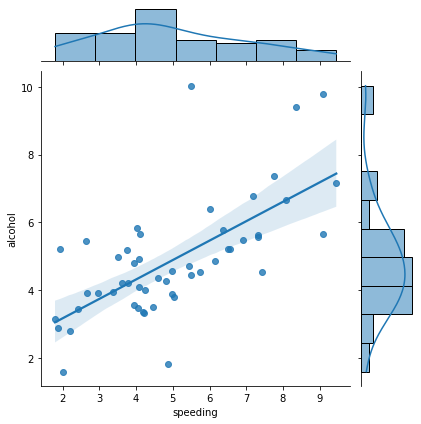

In [ ]:
# Jointplot compares 2 distributions and plots a scatter plot by default
# As we can see as people tend to speed they also tend to drink & drive
# With kind you can create a regression line with kind='reg'
# You can create a 2D KDE with kind='kde'
# Kernal Density Estimation estimates the distribution of data
# You can create a hexagon distribution with kind='hex'
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

### KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

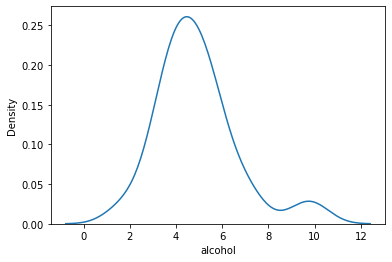

In [ ]:
# Get just the KDE plot
sns.kdeplot(crash_df['alcohol'])

### Pair Plots

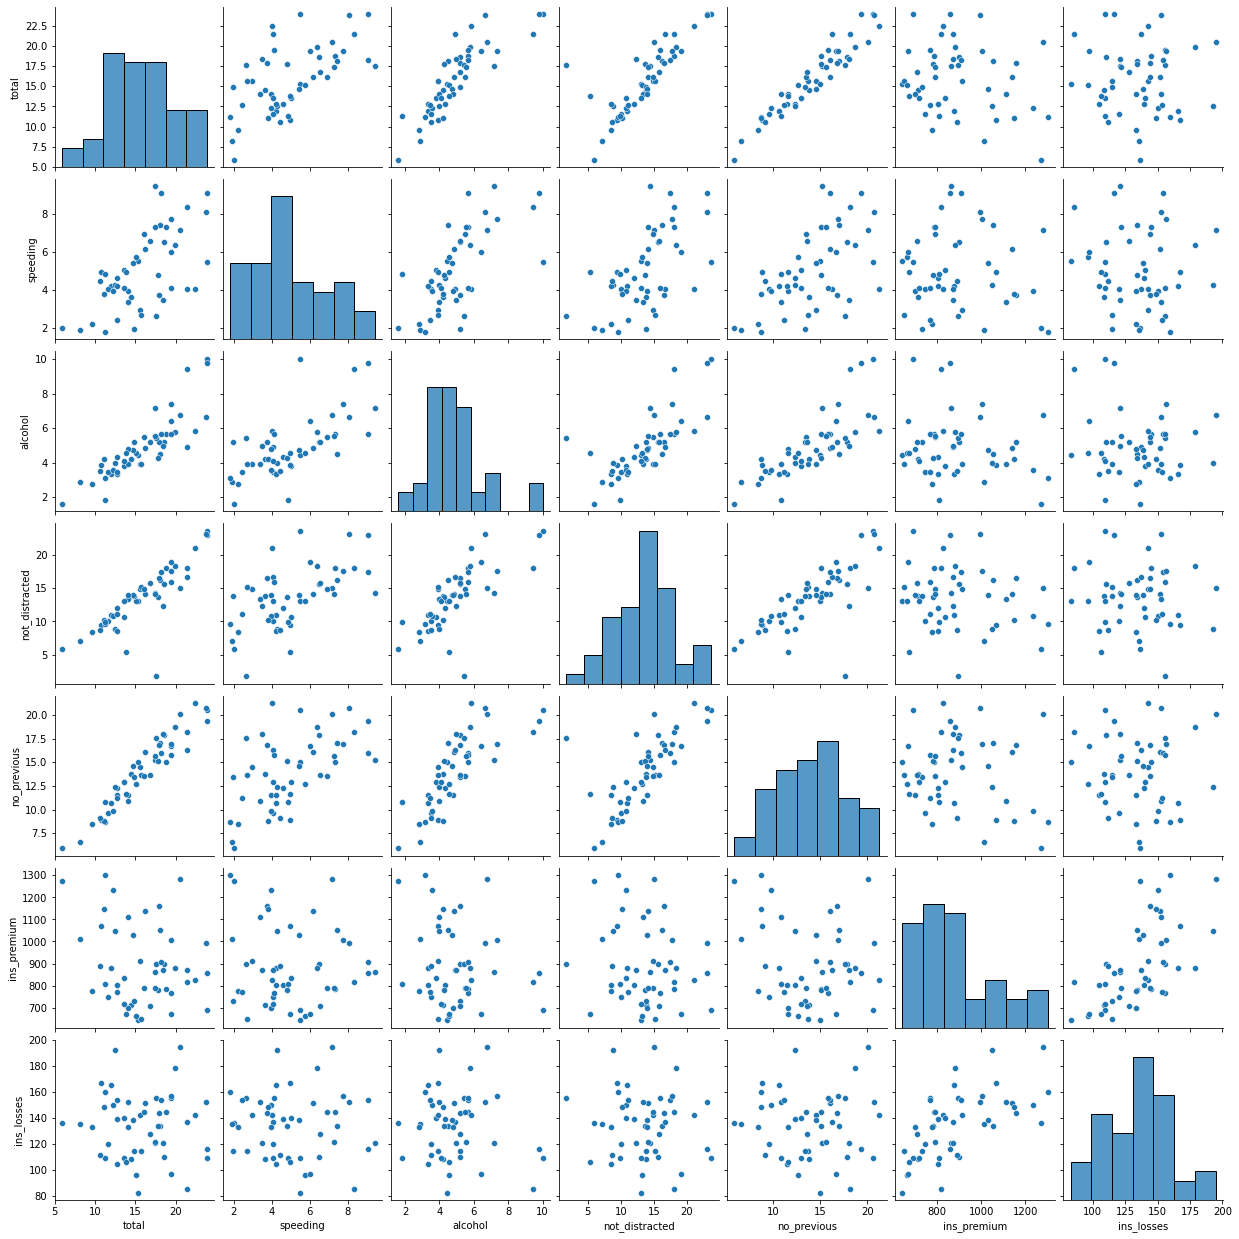

In [ ]:
# Pair Plot plots relationships across the entire data frames numerical values
sns.pairplot(crash_df)

# Load data on tips
tips_df = sns.load_dataset('tips')

# With hue you can pass in a categorical column and the charts will be colorized
# You can use color maps from Matplotlib to define what colors to use
# sns.pairplot(tips_df, hue='sex', palette='Blues')

### Styling

<Figure size 576x288 with 0 Axes>

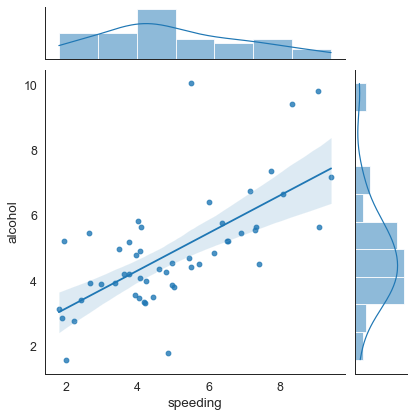

In [ ]:
# You can set styling for your axes and grids
# white, darkgrid, whitegrid, dark, ticks
sns.set_style('white')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(8,4))

# Change size of lables, lines and other elements to best fit
# how you will present your data (paper, talk, poster)
sns.set_context('paper', font_scale=1.4)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

# Get rid of spines
# You can turn of specific spines with right=True, left=True
# bottom=True, top=True
sns.despine(left=False, bottom=False)

### Categorical Plots

### Bar Plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

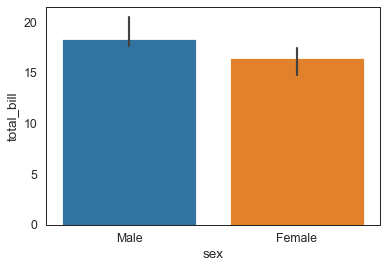

In [ ]:
# Focus on distributions using categorical data in reference to one of the numerical
# columns

# Aggregate categorical data based on a function (mean is the default)
# Estimate total bill amount based on sex
# With estimator you can define functions to use other than the mean like those
# provided by NumPy : median, std, var, cov or make your own functions
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)

### Count Plot

<AxesSubplot:xlabel='sex', ylabel='count'>

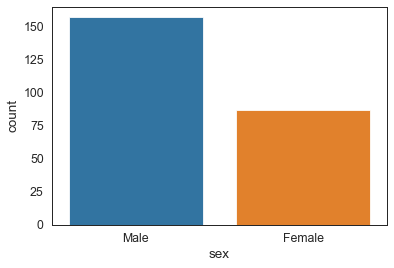

In [ ]:
# A count plot is like a bar plot, but the estimator is counting 
# the number of occurances
sns.countplot(x='sex', data=tips_df)

### Box Plot

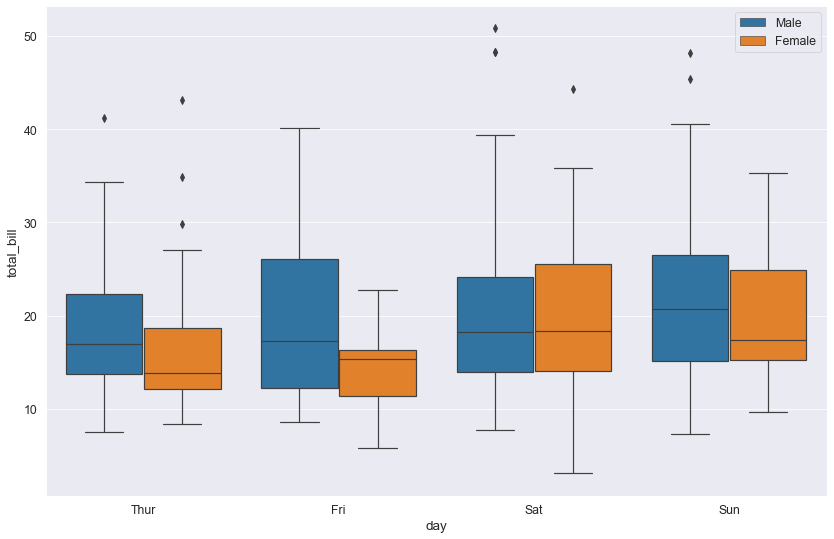

In [ ]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
# Hue can add another category being sex
# We see men spend way more on Friday versus less than women on Saturday
sns.boxplot(x='day',y='total_bill',data=tips_df, hue='sex')

# Moves legend to the best position
plt.legend(loc=0)

### Violin Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

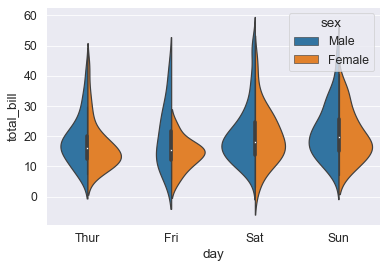

In [ ]:
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation
# of the data points
# Split allows you to compare how the categories compare to each other
sns.violinplot(x='day',y='total_bill',data=tips_df, hue='sex',split=True)

### Strip Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

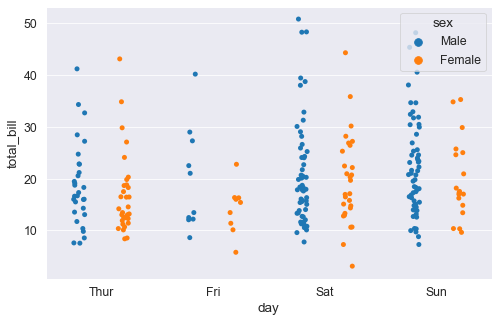

In [ ]:
plt.figure(figsize=(8,5))

# The strip plot draws a scatter plot representing all data points where one
# variable is categorical. It is often used to show all observations with 
# a box plot that represents the average distribution
# Jitter spreads data points out so that they aren't stacked on top of each other
# Hue breaks data into men and women
# Dodge separates the men and women data
sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True)

### Swarm Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

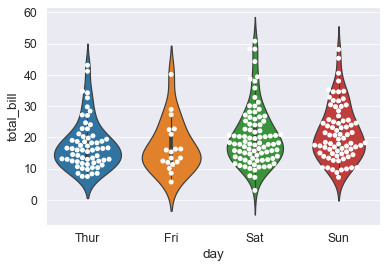

In [ ]:
# A swarm plot is like a strip plot, but points are adjusted so they don't overlap
# It looks like a combination of the violin and strip plots
# sns.swarmplot(x='day',y='total_bill',data=tips_df)

# You can stack a violin plot with a swarm
sns.violinplot(x='day',y='total_bill',data=tips_df)
sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white')


### Palettes

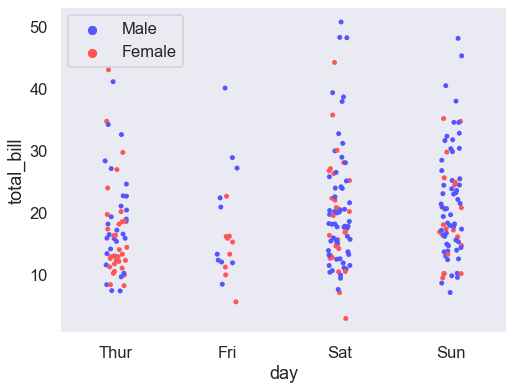

In [ ]:
plt.figure(figsize=(8,6))

sns.set_style('dark')

sns.set_context('talk')

# You can use Matplotlibs color maps for color styling
# https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
sns.stripplot(x='day',y='total_bill',data=tips_df, hue='sex', 
             palette='seismic')

# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html)
# or supply a tuple of x & y from lower left
plt.legend(loc=0)

### Matrix Plots

### Heatmaps

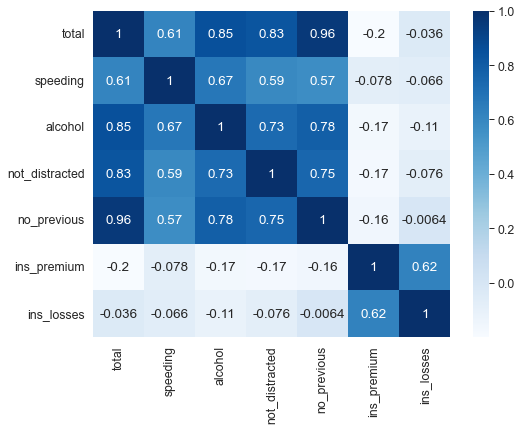

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

# Correlation tells you how influential a variable is on the result
# So we see that n previous accident is heavily correlated with accidents, while the
# insurance premium is not
crash_mx = crash_df.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(crash_mx, annot=True, cmap='Blues');

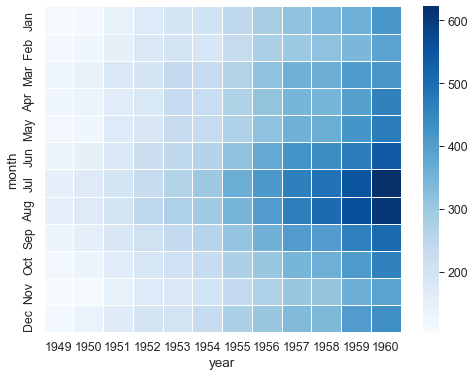

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# We can create a matrix with an index of month, columns representing years
# and the number of passengers for each
# We see that flights have increased over time and that most people travel in
# July and August
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index='month', columns='year', values='passengers')
# You can separate data with lines
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1);

### Cluster Map

<Figure size 576x432 with 0 Axes>

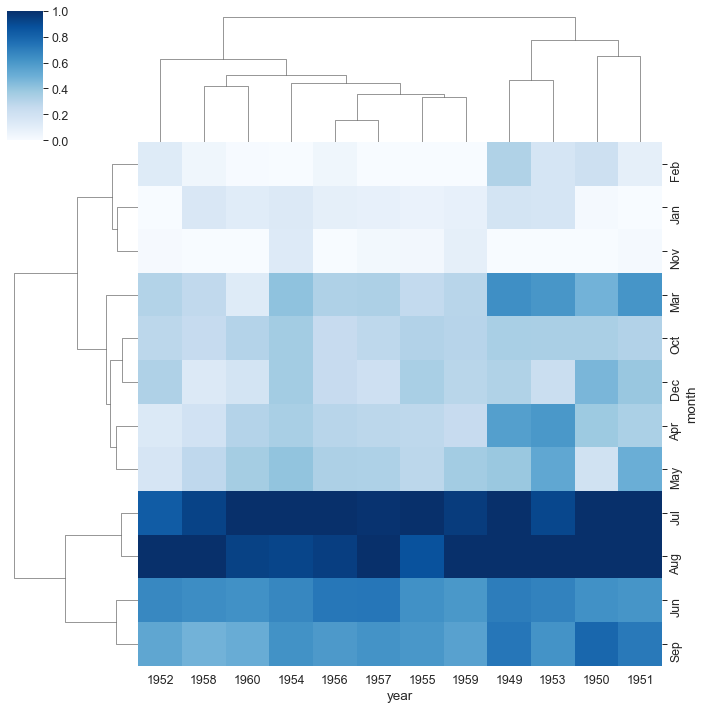

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# A Cluster map is a hierarchically clustered heatmap
# The distance between points is calculated, the closest are joined, and this
# continues for the next closest (It compares columns / rows of the heatmap)
# This is data on iris flowers with data on petal lengths
iris = sns.load_dataset("iris")
# Return values for species
# species = iris.pop("species")
# sns.clustermap(iris)

# With our flights data we can see that years have been reoriented to place
# like data closer together
# You can see clusters of data for July & August for the years 59 & 60
# standard_scale normalizes the data to focus on the clustering
sns.clustermap(flights,cmap="Blues", standard_scale=1)


### PairGrid

<Figure size 576x432 with 0 Axes>

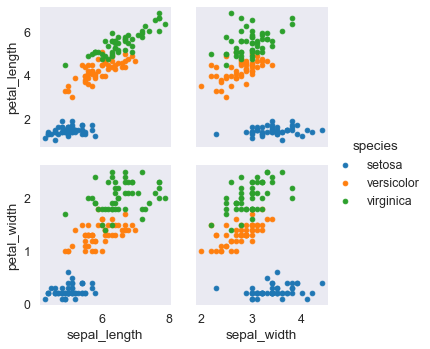

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# You can create a grid of different plots with complete control over what is displayed
# Create the empty grid system using the provided data
# Colorize based on species
# iris_g = sns.PairGrid(iris, hue="species")

# Put a scatter plot across the upper, lower and diagonal
# iris_g.map(plt.scatter)

# Put a histogram on the diagonal 
# iris_g.map_diag(plt.hist)
# And a scatter plot every place else 
# iris_g.map_offdiag(plt.scatter)

# Have different plots in upper, lower and diagonal
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

# You can define define variables for x & y for a custom grid
iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)

# Add a legend last
iris_g.add_legend();

### Facet Grid

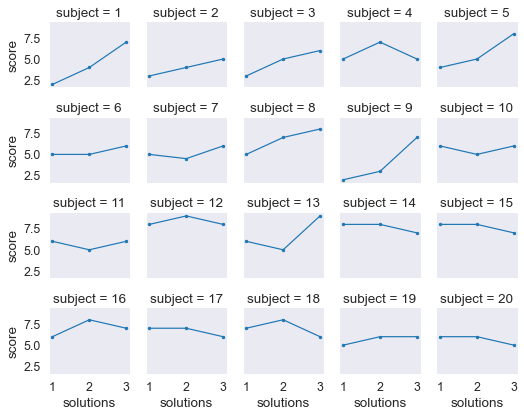

In [ ]:
# Can also print multiple plots in a grid in which you define columns & rows
# Get histogram for smokers and non with total bill for lunch & dinner
# tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

# You can pass in attributes for the histogram
# tips_fg.map(plt.hist, "total_bill", bins=8)

# Create a scatter plot with data on total bill & tip (You need to parameters)
# tips_fg.map(plt.scatter, "total_bill", "tip")

# We can assign variables to different colors and increase size of grid
# Aspect is 1.3 x the size of height
# You can change the order of the columns
# Define the palette used
# tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
#                       col_order=['Dinner', 'Lunch'], palette='Set1')
# tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor='w')

# # Define size, linewidth and assign a color of white to markers
# kws = dict(s=50, linewidth=.5, edgecolor="w")
# # Define that we want to assign different markers to smokers and non
# tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
#                         hue_order=['Yes','No'], 
#                         hue_kws=dict(marker=['^', 'v']))
# tips_fg.map(plt.scatter, "total_bill", "tip", **kws)
# tips_fg.add_legend()

# This dataframe provides scores for different students based on the level
# of attention they could provide during testing
att_df = sns.load_dataset("attention")
# Put each person in their own plot with 5 per line and plot their scores
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.');

### Regression Plots

In [ ]:
# lmplot combines regression plots with facet grid
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

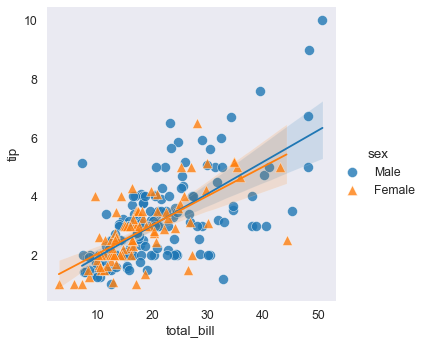

In [ ]:
plt.figure(figsize=(8,6));
sns.set_context('paper', font_scale=1.4);

plt.figure(figsize=(8,6));

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'});

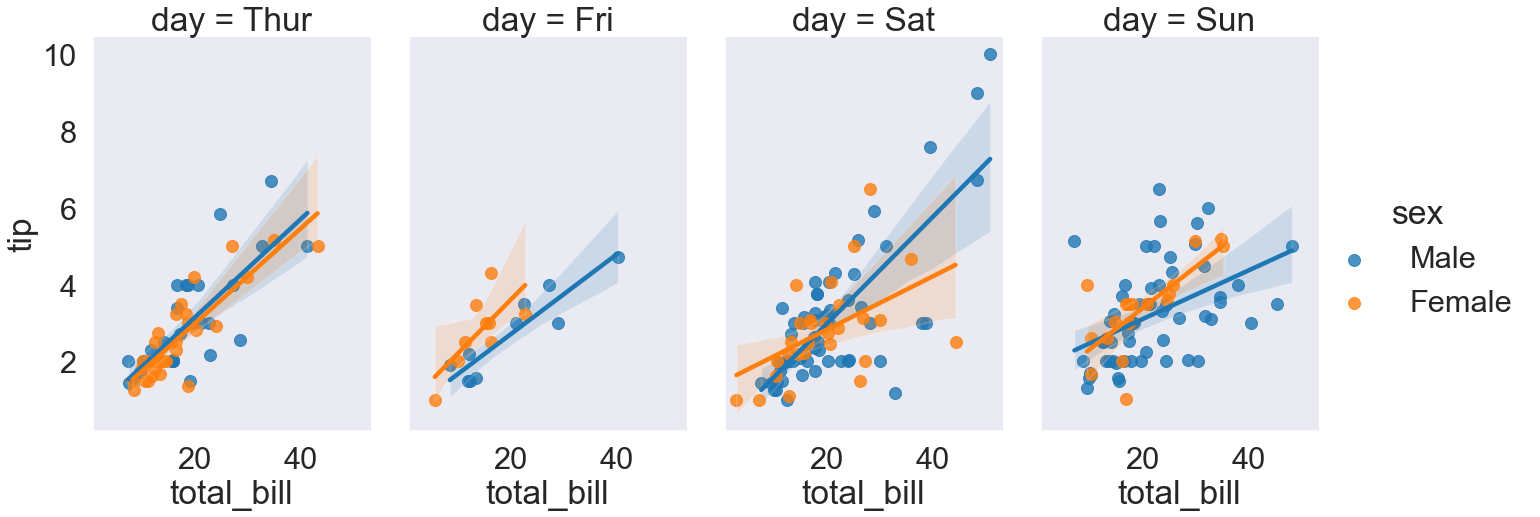

In [ ]:
# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

# Makes the fonts more readable
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6);

# Visualization with Pandas and Matplotlib in Python
The focus of this module is to provide skills for visualization of different type datasets and to ensure that participants are comfortable with python packages for data visualization. In this module, we will learn about $\href{https://matplotlib.org/}{\text{matplotlib}}$ and $\href{https://seaborn.pydata.org/}{\text{seaborn}}$ which are python packages mostly used for visualising static statistical plots. Other python packages such as $\href{https://plotly.com/}{\text{plotly}}$, $\href{https://bokeh.org/}{\text{Bokeh}}$ and $\href{https://streamlit.io/}{\text{streamlit}}$ are used to visualize dynamic data.

Static data refers to a fixed data or, data that remains the same after it's collected. Dynamic data, on the other hand, continually changes after it's recorded in order to maintain its integrity.

We will first dive into `matplotlib`. `matplotlib` is a visualization library that is built on top of $\href{https://numpy.org/}{\text{NumPy}}$ and is designed to work along with $\href{https://www.scipy.org/}{\text{SciPy}}$. It is mostly used as a standalone package but in recent times, it is also used as wrappers on other packages including `pandas`.

For the first part of the session, we will use simple generated data. This data may act as a `Hello World!` for `matplotlib`. Afterwards, we will dive deeper by using `matplotlib` on DataFrames

## Installing `matplotlib`
One can install `matplotlib` using their python package. There are two python package manager and they are `pip` and `conda`. To install `matplotlib`, open your terminal or command prompt and type the code below. 

For those using `pip` as their python package manager, type; <br>
`pip install matplotlib` 

For those using `conda` as their python package manager, type; <br>
`conda install matplotlib`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

Let us start by creating a simple example.

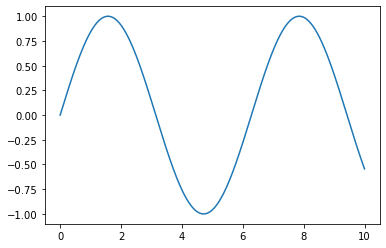

In [ ]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 1001)   # generating 100 evenly space numbers between 0 and 10 
y = np.sin(x)
plt.plot(x, y) # calling for the plot function on x and sin(x)

 ## `show()` or No `show()` (How to display your plots)
A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context. 

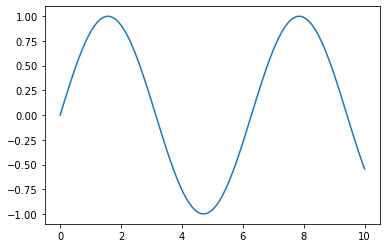

In [ ]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 
plt.plot(x, np.sin(x))     # calling for the plot function on x and sin(x)
plt.show()  # calling for the show function

Alternatively, you can use `;` to suppress such unwanted information. In python, `;` is used to suppress output.

In [ ]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 

plt.plot(x, np.sin(x));     # calling for the plot function on x and sin(x)

## Setting Styles
There are many styles in `matplotlib` that one can use. 

In [ ]:
plt.style.available?

In [ ]:
plt.style.use('seaborn')

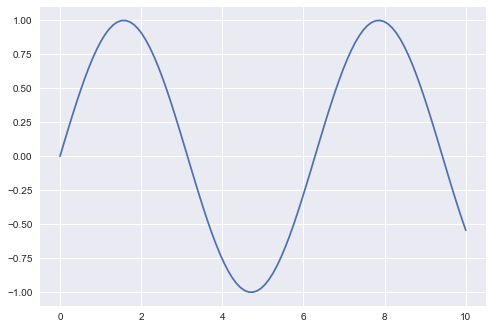

In [ ]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 
plt.plot(x, np.sin(x));     # calling for the plot function on x and sin(x)

One can create a single figure with multiple lines by calling the `plot` function multiple times

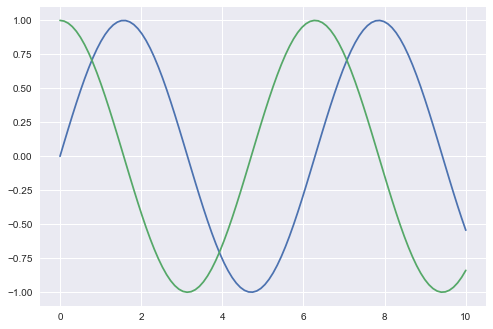

In [ ]:
# Plotting multiple lines using matplotlib
plt.plot(x, np.sin(x))   # plotting the first line
plt.plot(x, np.cos(x))  # plotting the second line
plt.show()

## Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the savefig() command. For example, to save the previous figure as a PNG file, you can run this:

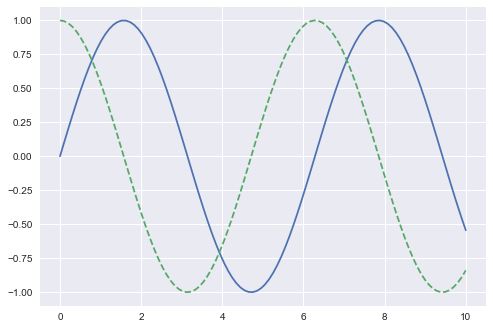

In [ ]:
#plt.style.use('classic')
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
fig.savefig('my_figure2.png')   # calling savefig function to save the plot

## Plotting lines in `matplotlib`

As you can see in the previous plots, `matplotlib` chose the colors and the type of lines automatically. However, one can also set their own colors and line types. Let us look at some examples in the cells below.

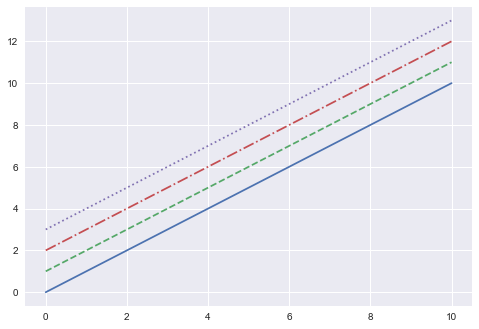

In [ ]:
# changing the linestyles
plt.plot(x, x + 0, linestyle='solid')    
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

Alternatively, I can use short cuts to obtain the above plot exactly. 

|character|description|
| ----------- | ----------- |
|```-``` | solid |
|```--``` | dashed |
|```-.``` | dash-dot |
|```:``` | dotted |

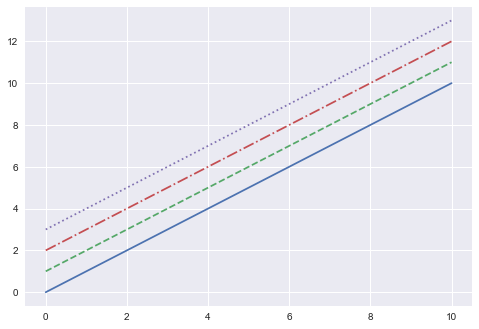

In [ ]:
# For short, you can use the following codes:
plt.plot(x, x + 0, linestyle='-')  # solid
plt.plot(x, x + 1, linestyle='--') # dashed
plt.plot(x, x + 2, linestyle='-.') # dashdot
plt.plot(x, x + 3, linestyle=':');  # dotted

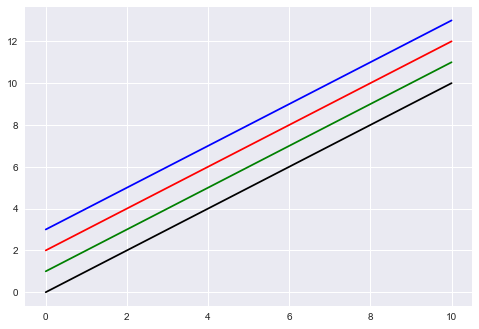

In [ ]:
# changing colours of lines
plt.plot(x, x + 0, color='black')  
plt.plot(x, x + 1, color='green') 
plt.plot(x, x + 2, color='red') 
plt.plot(x, x + 3, color='blue')
plt.show()

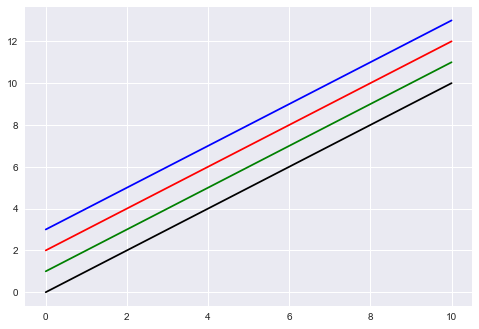

In [ ]:
plt.plot(x, x + 0, color='k')  # black line
plt.plot(x, x + 1, color='g')  # green line
plt.plot(x, x + 2, color='r')  # red line 
plt.plot(x, x + 3, color='b'); # blue line

This is the abbreviations for the colours available in `matplotlib`.

| character | color |
| ----------- | ----------- |
| ``'b'`` | blue |
| ``'g'`` | green |
| ``'r'`` | red |
| ``'c'`` | cyan |
| ``'m'`` | magenta |
| ``'y'`` | yellow |
| ``'k'`` | black |
| ``'w'`` | white |

An advantage of using `matplotlib`, is the ability to combine color choice and linestyle. Let us see the example in the cell below.

Next, let us look at some combinations.

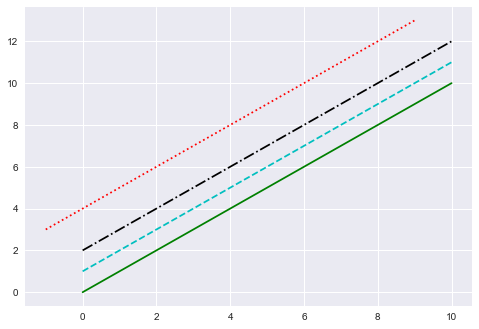

In [ ]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x-1, x + 3, ':r'); # dotted red

In [ ]:
plt.plot(x, x+0, '-g', x, x+1, '--c', x, x+2, '-.k', x, x+3, ':r');

Also, one can choose the type of marker they want. For example, in the cell below, we have `go--`. This will generate a green circle marker with dashed lines running in it.

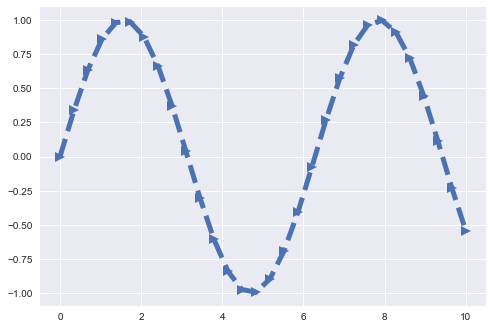

In [ ]:
y = np.linspace(0, 10, 30)
plt.plot(y, np.sin(y), '>--', linewidth=5, markersize=10);

**Markers**

|character|description|
| ----------- | ----------- |
|```.``` | point marker|
|```,``` | pixel marker|
|```o``` | circle marker|
|```v``` | triangle_down marker|
|```^``` | triangle_up marker|
|```<``` | triangle_left marker|
|```>``` | triangle_right marker|
|```1``` | tri_down marker|
|```2``` | tri_up marker|
|```3``` | tri_left marker|
|```4``` | tri_right marker|
|```s``` | square marker|
|```p``` | pentagon marker|
|```*``` | star marker|
|```h``` | hexagon1 marker|
|```H``` | hexagon2 marker|
|```+``` | plus marker|
|```x``` | x marker|
|```D``` | diamond marker|
|```d``` | thin_diamond marker|
|```_``` | hline marker|

The general approach to the `plot` function is very simple;

```plot(x, y, [fmt], **kwargs)``` <br>
```plot(x, y, [fmt], x2, y2, [fmt], ..., **kwargs)```

## Adjusting the axes limits
The axes are adjusted by using `xlim` and `ylim` functions.

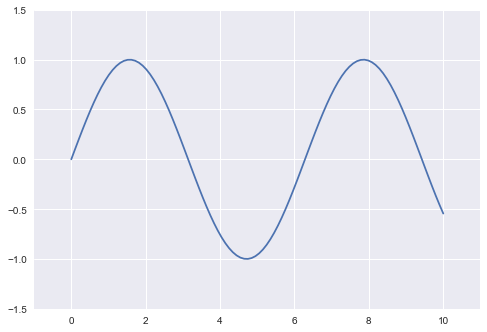

In [ ]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)         # changing the limits of the x-axis
plt.ylim(-1.5, 1.5);     # changing the limits of the y-axis

Alternatively, one can use the `axis` function. `axis()` method allows you to set the `x` and `y` limits with a single call, by passing a list which specifies `[xmin, xmax, ymin, ymax]`:

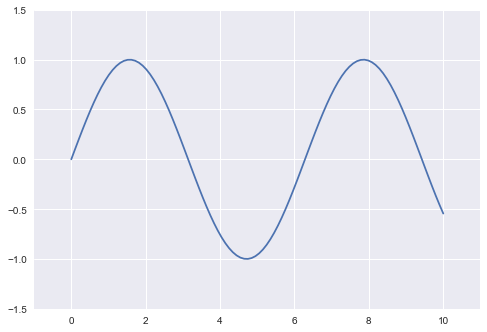

In [ ]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);  # alternative approach to changing the limit of the axes

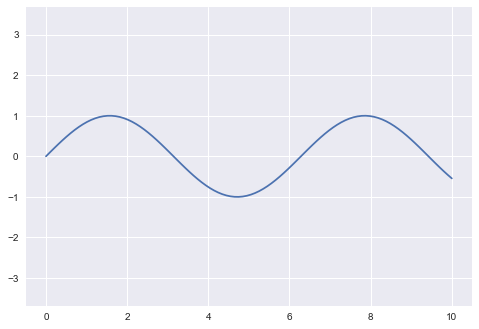

In [ ]:
plt.plot(x, np.sin(x))
plt.axis('equal');  # equal option creates a 1:1 aspect ratio

## Labeling plots

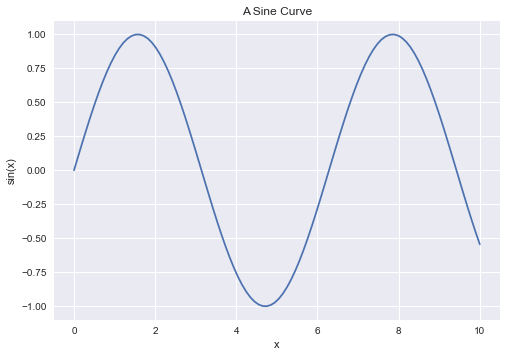

In [ ]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")  # adding title of the plot
plt.xlabel('x')            # adding label for the x-axis of the plot 
plt.ylabel('sin(x)');      # adding label for the y-axis of the plot 
plt.title?

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type. Again, Matplotlib has a built-in way of quickly creating such a legend. It is done via the `legend()` method. Though there are several valid ways of using this, it easier to specify the label of each line using the `label` keyword of the plot function:

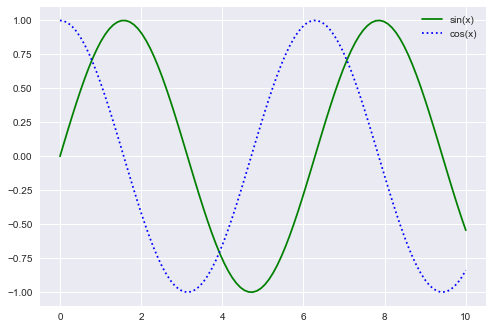

In [ ]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b', label='cos(x)')   # adding the label argument for plot 2
plt.legend(); # calling for the legend

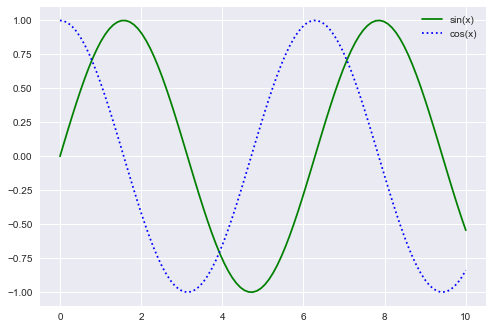

In [ ]:
plt.plot(x, np.sin(x), '-g')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b')   # adding the label argument for plot 2
plt.legend(['sin(x)','cos(x)']); # calling for the legend

## Scatter Plot

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot. Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape. 

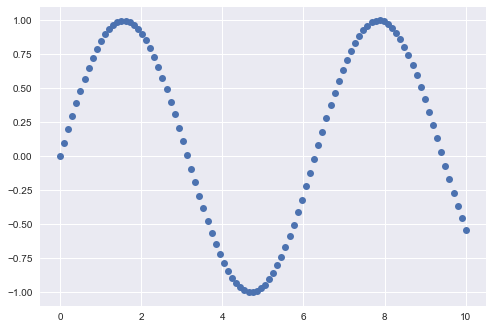

In [ ]:
# showing a scatter plot with `plot` function
plt.plot(x, np.sin(x), 'o');

Mainly, and a more powerful method of creating scatter plots is the `scatter` function, which can be used very similarly to the `plot` function:

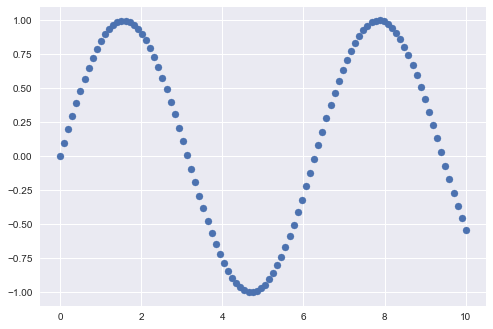

In [ ]:
# plotting scatter plot
plt.scatter(x, np.sin(x));
plt.scatter?

### `plot` Versus `scatter`: A Note on Efficiency
Aside from the different features available in `plot` and `scatter`, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, `plot` can be noticeably more efficient than `scatter`. The reason is that `scatter` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In `plot`, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, `plot` should be preferred over `scatter` for large datasets.

## Plotting Histogram

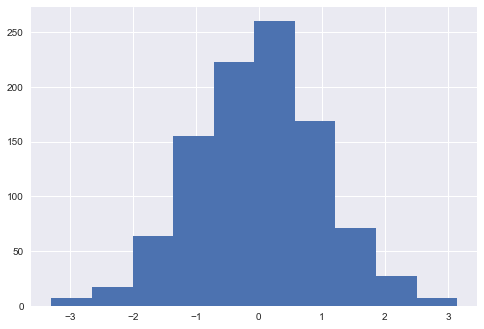

In [ ]:
data = np.random.randn(1000) # generating random normal numbers
plt.hist(data); # plotting histogram

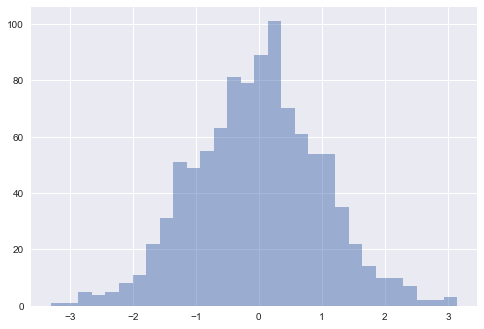

In [ ]:
# tuning histogram plot
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', edgecolor=None);

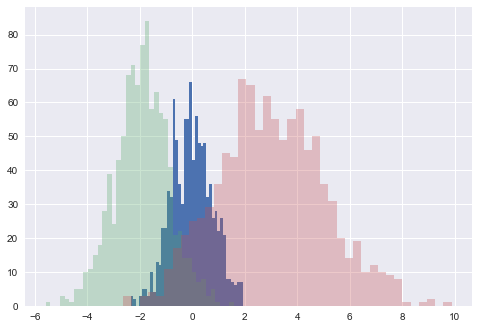

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist(x1, histtype='stepfilled', alpha=1, bins=40)
plt.hist(x2, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x3, histtype='stepfilled', alpha=0.3, bins=40);

An alternative to the cell above

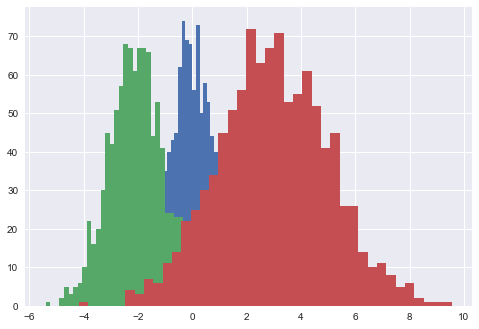

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict( bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);
np.random.randn?
plt.hist?

## Customizing plot legends
Plot legends give meaning to a visualization, assigning meaning to the various plot elements. We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the `legend()` command, which automatically creates a legend for any labeled plot elements:

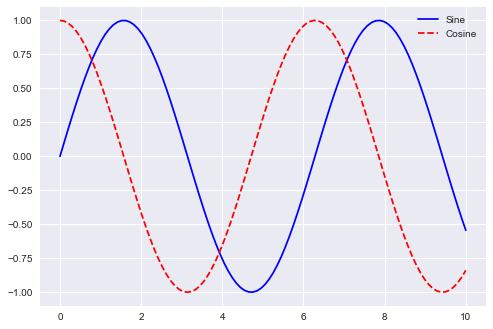

In [ ]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend();

But there are many ways we might want to customize such a legend. For example, we can specify the location and turn off the frame:

In [ ]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend(loc='upper right'); # adding positional argument to legend

We can use the `ncol` command to specify the number of columns in the legend and `title` to specify the title of the legend:

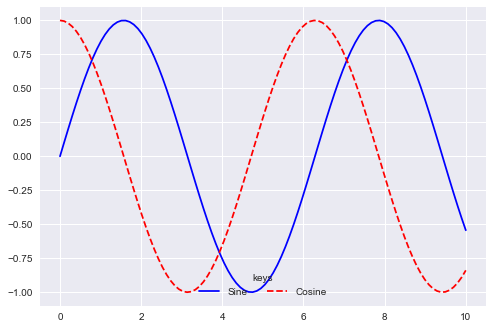

In [ ]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend(loc='lower center', ncol=2, title='keys');

## Creating Subplots
Sometimes it is helpful to compare different views of data side by side. To this end, Matplotlib has the concept of subplots: groups of smaller axes that can exist together within a single figure. These subplots might be insets, grids of plots, or other more complicated layouts. 

The most basic method of creating an axes is to use the `axes` function. `axes` also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent `[left, bottom, width, height]` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the x and y position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the x and y extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

In [ ]:
plt.axes()  # standard axes
plt.plot(x, np.sin(x))
plt.axes([0.65, 0.65, 0.2, 0.2]); # new coordinated figure
plt.plot(x, np.cos(x));

### Simple Grids of Subplots
Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create. The lowest level of these is `subplot()`, which creates a single subplot within a grid. As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

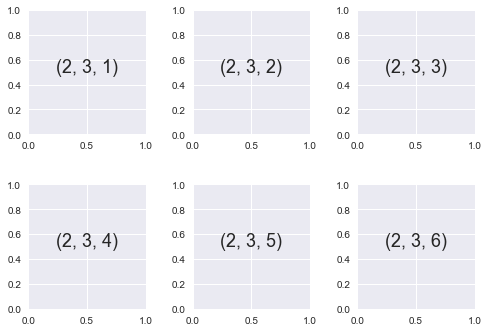

In [ ]:
plt.figure().subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

An example of subplot

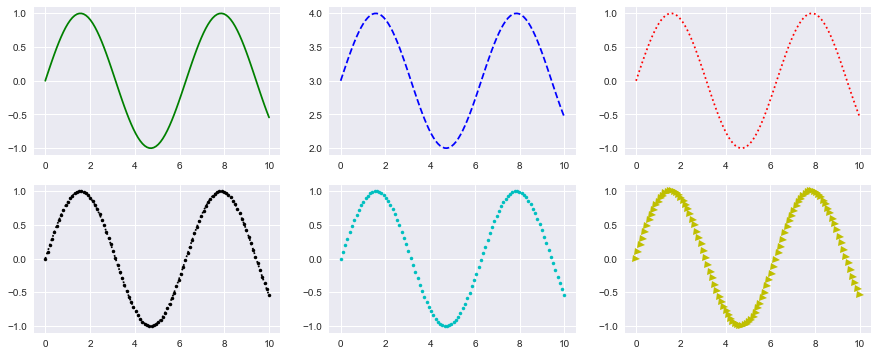

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, 1)
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, 2)
plt.plot(x, np.sin(x) + 3, '--b')
plt.subplot(2, 3, 3)
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(2, 3, 6)
plt.plot(x, np.sin(x) + 0, '>y');

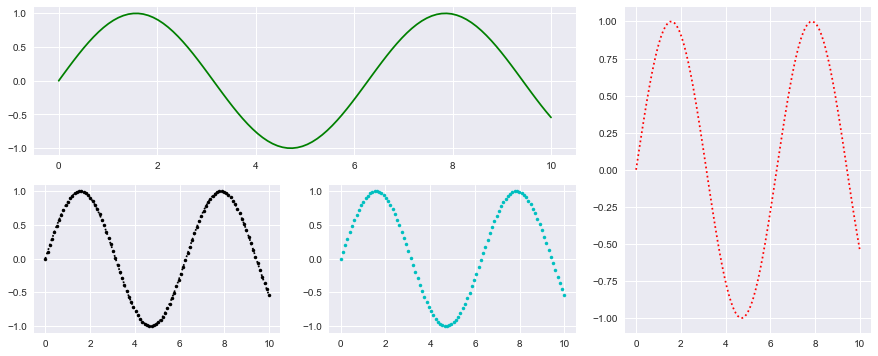

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, (1,2))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, (3,6))
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')

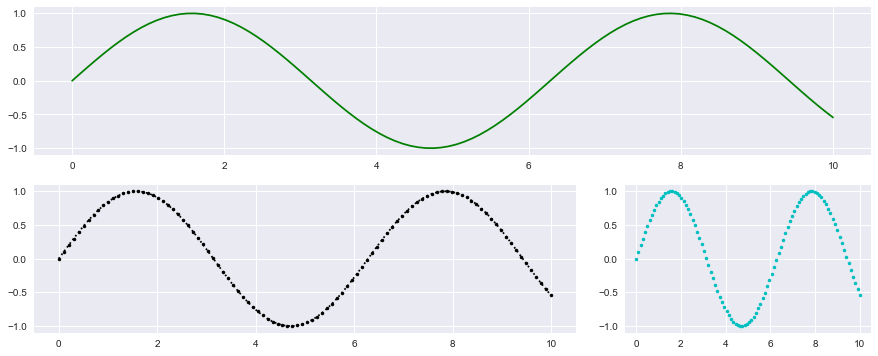

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, (1,3))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, (4,5))
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 6)
plt.plot(x, np.sin(x) + 0, '.c');

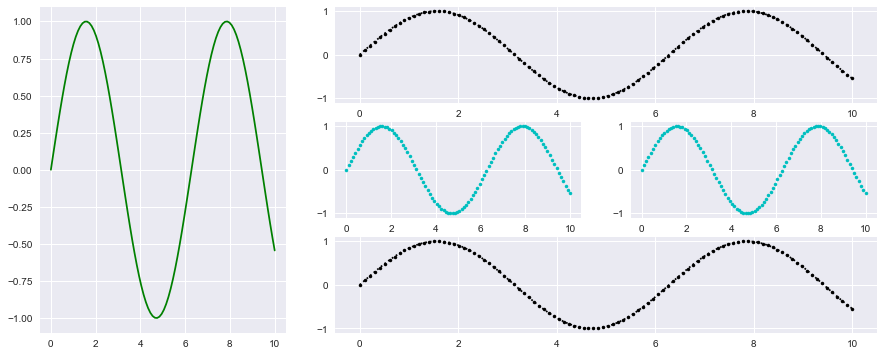

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(3, 3, (1,7))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(3, 3, (2,3))
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(3, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(3, 3, 6)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(3, 3, (8,9))
plt.plot(x, np.sin(x) + 0, ':.k')
plt.show()

## Text and Annotation
Creating a good visualization involves guiding the reader so that the figure tells a story. In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary. Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this. Let's take a look at some data and how we might visualize and annotate it to help convey interesting information. We'll start by setting up the notebook for plotting and importing the functions we will use:

Text(6, 7.5, 'Gradient (0.2, 0.2)')

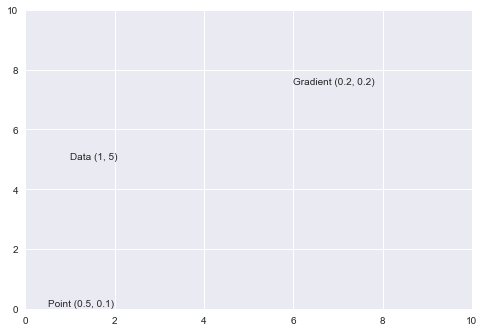

In [ ]:
plt.axis([0, 10, 0, 10])
plt.text(1, 5, "Data (1, 5)")
plt.text(0.5, 0.1, "Point (0.5, 0.1)")
plt.text(6, 7.5, "Gradient (0.2, 0.2)")

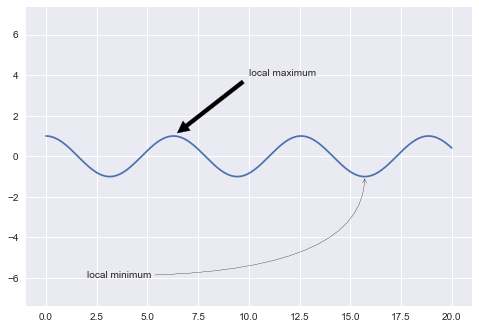

In [ ]:
x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.axis('equal')
plt.annotate('local maximum', 
             xy=(6.28, 1), 
             xytext=(10, 4), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('local minimum', 
             xy=(5 * np.pi, -1), 
             xytext=(2, -6),
             arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));

# Supervised Learning – Linear Regression

In [ ]:
# Handle all my imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

# 1. Introduction
Supervised learning use cases examples

- How much will be the daily, monthly, and yearly sales for agiven store for the next three years?
- How many car parking spaces should be allocated for a retail store?
- How much will be my monthly electricity cost for the next three years?
- What will be the temperature for the next five days?

The presence of the words ‘how much’ and ‘how
many’ implies that the answer for these questions will be a quantitative or continuous
number. The regression is one of the fundamental techniques that will help us to find answers to these types of questions by studying the relationship between the different
variables that are relevant to the questions that we are trying to answer.

<b>Example: </b>
Let’s consider a use case where we have collected students’ average test grade scores
and their respective average number of study hours for the test for group of similar IQ
students.

In [ ]:
data = {'Hours_Studied': [2,3,4,5,6,7,8,9,10],
       'Test_Grade':[57,66,73,76,79,81,90,96,100]}
df = pd.DataFrame(data)
df.head()

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79


In [ ]:
df.corr()

,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.987797
Test_Grade,0.987797,1.000000


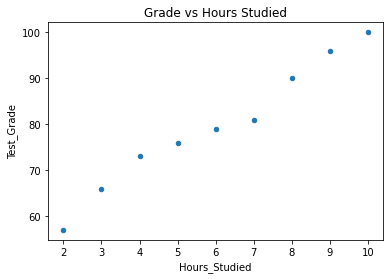

In [ ]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()

A simple scatter plot with hours studied on the x-axis and the test grades on the
y-axis shows that <b>the grade gradually increases with the increase in hours of study</b>. 

This implies that there is a linear relationship between the two variables. Further performing
the correlation analysis shows that there is 98% positive relationship between the two
variables, which means there is 98% chance that any change in study hours will lead to a
change in grade.

## 2. Linear Regression Model

For a given positive interger $n$, Linear Regression assumes the following model: 
 
 $$Y = X\alpha+ \beta  + \epsilon,$$
where
- $X = [X_1, \cdots, X_n], X_i \in R^m$ is the list of independant variables (explanatory),
- $Y\in R^m$ is the dependant variable (Target) 
- $\alpha^T = [\alpha_1, \cdots, \alpha_n]$ is list of coefficients called slope, 
- $\beta\in R^m$ in called the intercept, 
- $\epsilon \in R^m$ is the error that cannot be explained by model.

 
Let's use the linear regression function from the <b>scikit-learn</b> library to find the values of $\alpha$ and $\beta$.

Let us denote $\hat{Y}$ the mean value of  $Y$ i.e.$$\hat{Y} = \dfrac{1}{n}\sum_{1}^n y_i $$

## 2.1. How good is your model?
There are three metrics widely used for evaluating linear model performance.
### 2.1.1. R-Squared for goodness of fit

The R-squared metric is the most popular practice of evaluating how well your model fits
the data. 
$$ \text{R-squared} = 1 - \dfrac{\sum_{1}^n(e_i)^2}{\sum_{1}^n(Y_i -\bar{Y})^2} $$
It is a value between 0 and 1; the value
toward 1 indicates a better model fit. It can be computed with <b>r2_score</b> python function.

### 2.1.2. Mean Absolute Error (MAE)

The Mean Absolute Error, denoted MAE, is the mean or average of absolute value of the errors.
$$\text{MAE}= \dfrac{1}{n}\sum_{1}^n \mid e_i\mid $$

MAE indicates how close the
predicted values are to the actual values; hence a lower MAE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_absolute_error</b> python function. 


### 2.1.3. Root Mean Squared Error (RMSE)
This is the square root of the mean of the squared errors. 

$$\text{MAE}= \sqrt{\dfrac{1}{n}\sum_{1}^n  (e_i)^2} $$
RMSE indicates how close the
predicted values are to the actual values; hence a lower RMSE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_squared_error</b> python function. 


### 2.2. Single variable Linear regression ($m=1$)

Let’s consider a use case where we have collected students's average python mark
and their respective average mark in the review phase.

In [ ]:
df = pd.read_csv('PythonEffect.csv')
# print(df.info())
df.head()

,PythonMark,ReviewPhaseMark
0,6,6
1,5,6
2,8,10
3,14,15
4,10,10


In [ ]:
df.corr()

,PythonMark,ReviewPhaseMark
PythonMark,1.000000,0.904868
ReviewPhaseMark,0.904868,1.000000


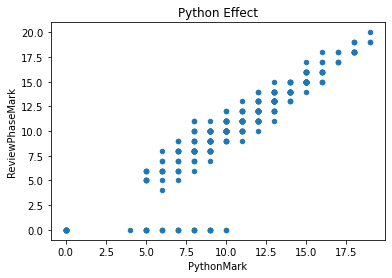

In [ ]:
# Simple scatter plot
df.plot(kind='scatter', x='PythonMark', y='ReviewPhaseMark', title='Python Effect')
plt.show()

In [ ]:
# Create linear regression object
Single_lr = LinearRegression()
# #Extract 
X= df.PythonMark.values.reshape(-1, 1) # independent variable
Y= df.ReviewPhaseMark.values.flatten() # dependent variable


In [ ]:
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it
Single_lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# get the value of alpha and beta
alpha = Single_lr.coef_
beta = Single_lr.intercept_

# print the value of alpha and beta
print('alpha = ', alpha[0])
print('beta = ', beta)


alpha =  1.1096258969443358
beta =  -1.4936733199830208


In [ ]:
# Make predictions using the testing set
Y_pred = Single_lr.predict(X_test)

# R-squared
print('R-squared: %.2f' % r2_score(Y_test, Y_pred))
# mean absolute error
print("mean absolute error: %.2f"% mean_absolute_error(Y_test, Y_pred))
# Mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))


R-squared: 0.79
mean absolute error: 1.21
Mean squared error: 4.22


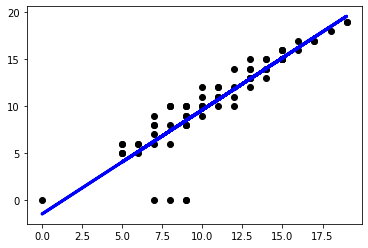

In [ ]:
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.show()


### 2.3.  Multivariate Linear regression ($m>1$)

Let us consider the following data

In [ ]:
# Import the data and inspect it
maths = pd.read_csv('student-mat.csv')
maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
print(maths.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

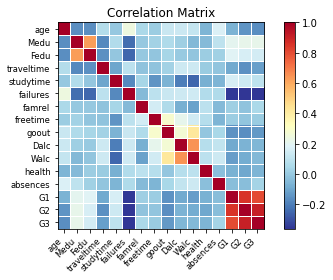

In [ ]:
corr = maths.corr()
# maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [ ]:
maths.sex.unique()#this is a categorical variable

array(['F', 'M'], dtype=object)

In [ ]:
maths.famsize.unique()#this is a categorical variable

array(['GT3', 'LE3'], dtype=object)

<b>Note that sklearn can only accept numerical inputs</b>.

### 2.3.1. Pre-processing of labeled data
The categorical variables need to be handled appropriately before running the first
iteration of the model. Scikit-learn provides useful built-in preprocessing functions to
handle categorical variables.

- <b>LabelBinarizer</b>: This will replace the binary variable text withvnumeric vales. We'll be using this function for the binary categorical variables.

- <b>LabelEncoder</b>: This will replace category level with number representation.

- <b>OneHotEncoder</b>: This will convert n levels to n-1 new variable, and the new variables will use 1 to indicate the presence of level and 0 for otherwise. Note that before calling <b>OneHotEncoder</b>, we should use <b>LabelEncoder</b> to convert levels to number. Alternatively we can achieve the same using get_dummies of the Pandas package. This is much more efficient to use as we can directly use it on the column with text description without having to convert to numbers first.

In [ ]:
# # Convert binary variable 'sex' to numeric boolean fields
lb = LabelBinarizer()
maths.sex = lb.fit_transform(maths.sex)
maths.sex.unique()

array([0, 1])

In [ ]:
# # Convert binary variable 'famsize' to numeric boolean fields
maths.famsize = lb.fit_transform(maths.famsize)
maths.famsize.unique()

array([0, 1])

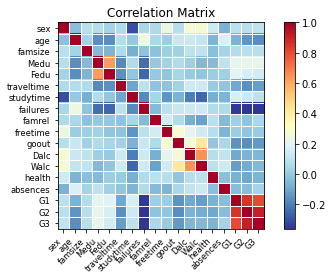

In [ ]:
corr = maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()



In [ ]:
maths = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2', 'G3']]


MX = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2']].values.reshape(-1, 7)
MY = maths['G3'].values.flatten()

In [ ]:
# split-up our current X & y variables into training
# and testing data.

MX_train, MX_test, MY_train, MY_test = train_test_split(MX,MY, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it

Multi_lr = LinearRegression()
Multi_lr.fit(MX_train, MY_train)

LinearRegression()

In [ ]:
# Lets take a look at how well this model preforms
print("The R-Squared: ", Multi_lr.score(MX_test, MY_test))
alpha = Multi_lr.coef_
beta = Multi_lr.intercept_

for i in range(alpha.size):
    print(maths.columns[i], ': ', alpha[i])
print('The intercept of our slope is: ', beta)

The R-Squared:  0.7983552161587196
sex :  0.16476928111566563
famsize :  -0.020837379216875864
studytime :  -0.043940699688089634
famrel :  0.3631349649085571
absences :  0.04105103296124567
G1 :  0.15698723303548884
G2 :  0.9987849801717963
The intercept of our slope is:  -3.683923561369623


In [ ]:
MY_pred = Multi_lr.predict(MX_test)
print('Mean Absolute Error:', mean_absolute_error(MY_test, MY_pred))  
print('Mean Squared Error:', mean_squared_error(MY_test, MY_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(MY_test, MY_pred)))

Mean Absolute Error: 1.3100825502382831
Mean Squared Error: 4.134735824024409
Root Mean Squared Error: 2.0334049827873466



# Supervised Learning –  Logistic Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
dataset = pd.read_csv("Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = dataset[["SepalLengthCm","SepalWidthCm", "PetalLengthCm","PetalWidthCm"]].values.reshape(-1,4)
y = dataset["Species"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0, multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)### Print results 
probs_y = np.round(probs_y, 2)
probs_y
result = pd.DataFrame(probs_y, columns= np.unique(dataset.Species))
result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=y_pred)
result.sample(10)

,Test,Predicted,Iris-setosa,Iris-versicolor,Iris-virginica
21,Iris-versicolor,Iris-versicolor,0.01,0.71,0.28
14,Iris-versicolor,Iris-versicolor,0.00,0.71,0.29
12,Iris-versicolor,Iris-versicolor,0.00,0.79,0.20
4,Iris-setosa,Iris-setosa,0.97,0.03,0.00
35,Iris-versicolor,Iris-versicolor,0.05,0.88,0.07
11,Iris-versicolor,Iris-versicolor,0.01,0.81,0.18
20,Iris-virginica,Iris-virginica,0.00,0.19,0.81
24,Iris-virginica,Iris-virginica,0.00,0.43,0.57
36,Iris-setosa,Iris-setosa,0.94,0.06,0.00
23,Iris-setosa,Iris-setosa,0.98,0.02,0.00


In [ ]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


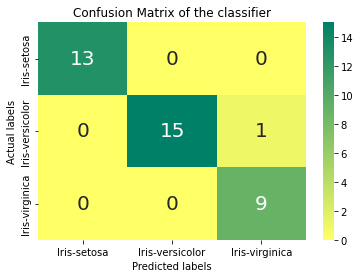

In [ ]:
# confusion matrix sns heatmap 
#ax = plt.axes()
sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(dataset.Species),
           yticklabels=np.unique(dataset.Species))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


# Quiz 1

**Exercise 1** <font color=red> (8/8) </font>

1 - write a function, called **sum_prod**, that takes $n$ and $m$ as input and return return A and B given by $$A = \sum_{i=m}^{n} i, \quad B = \prod_{i=m}^{n} i $$ The default value of m should be 1. Check your function for $n=10$. <font color=red> (4/4) </font>

In [ ]:
def sum_prod(n=10, m=1):
    A, B = 0, 1
    for i in range(m, n+1):
        A += i; B *= i
    
    return A, B

print("By default, n=10 and m=1 and (sum, prod): ", sum_prod())

By default, n=10 and m=1 and (sum, prod):  (55, 3628800)


2- Write a Python function called **Facto** that calculates the factorial of a non-negative integer. The function accepts the number as an argument. Compute the factorial of 57. <font color=red> (4/4) </font>

In [ ]:
def Facto(n):
    f = 1
    for i in range(1, n+1):
        f *= i
    
    return f

print("Factorial: 57! =", Facto(57))

Factorial: 57! = 40526919504877216755680601905432322134980384796226602145184481280000000000000


**Exercise 2** <font color=red> (5/5) </font>

1- Using the list comprehensions, write a function, **ListComp** that takes a list $L$ of strings as input and returns 
- a list that consists of the strings of $L$ with their last characters removed
- a list of the lengths of the strings of $L$
- a list that consists of only those strings of $L$ that are at most 3 characters long

<font color=red> Correct (4/4) </font>

In [ ]:
def ListComp(L):
    L_rem_last = [s[:-1] for s in L]
    L_len = [len(s) for s in L]
    L_atl3 = [s for s in L if (len(s) <= 3)]
    
    return L_rem_last, L_len, L_atl3

2- Check your function using the names of your closest friends at AIMS.

<font color=red> Correct (1/1) </font>

In [ ]:
List_remove_last, List_len_string, List_atleast_3char = ListComp("aime,ala,mercy,k".split(","))
print("List of strings in L with last char removed:", List_remove_last)
print("List of length of strings in L:", List_len_string)
print("List of strings in L that are atleast 3 char long:", List_atleast_3char)

List of strings in L with last char removed: ['aim', 'al', 'merc', '']
List of length of strings in L: [4, 3, 5, 1]
List of strings in L that are atleast 3 char long: ['ala', 'k']


**Exercise 3**

<font color=red> (6/6) </font>

A palindrome is a word that reads the same backwards as forwards. Write a program that asks the user to enter a word and determines whether the word is a palindrome or not

1- using a for loop

In [ ]:
w = input("Enter a word: ")

rev_w = ''
for l in w.lower():
    rev_w = l + rev_w
    
print(f"{w} is palindrome.") if (w.lower() == rev_w) else print(f"{w} is not a palindrome")

Enter a word: abcca
abcca is not a palindrome


2- using the string slicing

In [ ]:
w = input("Enter a word: ")
    
print(f"{w} is palindrome.") if (w.lower() == w[::-1].lower()) else print(f"{w} is not a palindrome")

Enter a word: abcbA
abcbA is palindrome.


**Exercise 4** <font color=red>  (4/4)  </font>

1- Write a Python function named **characterCase** that accepts a string $S$ as input and returns the number of upper case letters and lower case letters as dictionary $D$. 

For example, if S = 'My name is Hove' then D = {'up': 2, 'lc': 10}

<font color=red>  Correct(3/3)  </font>

In [ ]:
def characterCase(S):
    D = {"up": 0, "lc": 0}
    for l in S:
        D["up"] += (l.isupper())
        D["lc"] += (l.islower())
    
    return D

characterCase('My name is Hove')

{'up': 2, 'lc': 10}

2- Check for 'The quick Brow Fox and I'm proud of Mr McDonald'.

<font color=red>  Correct(1/1)  </font>

In [ ]:
characterCase("The quick Brow Fox and I'm proud of Mr McDonald")

{'up': 7, 'lc': 30}

**Exercise 5<font color=red> (3/3) </font>**

Write a function called **matches** that takes two strings as arguments and returns how many matches there are between the strings. A match is where the two strings have the same character at the same index. For instance, 'python' and 'path' match in the first, third, and fourth characters, so the function should return 3.

In [ ]:
def matches(s1, s2):
    n_match = len([l1 for l1, l2 in zip(s1, s2) if (l1 == l2)])
    
    return n_match

print("Number of matches in 'python' and 'path' is", matches('python', 'path'))

Number of matches in 'python' and 'path' is 3


**Exercise 6  <font color=red> 3.25/4 </font>**

Write a function **V** that takes a positive integer $n$ and a prime number $p$ and returns the greatest integer $r$ such that $p^r$ divides $n$. Check the function n=40 and p = 2.

In [ ]:
def V(n, p):
    for r in range(n//2, 0, -1):
        if (n % p**r == 0):
            return r
    return 0

print("Greatest integer r such that 2^r divides 40 is", V(40, 2))

Greatest integer r such that 2^r divides 40 is 3


**Exercise 7** **<font color='red'> (8/8) </font>**

1 - Write a Python function called <b>IsPrime</b> that takes a positive integer, $n$, as input and returns the boolean True if $n$ is a prime number and False, otherwise. 

Note : A prime number (or a prime) is a natural number greater than 1 and that has no positive divisors other than 1 and itself.

In [ ]:
def IsPrime(n):
    if (n == 1):
        return False
    else:
        for i in range(2, n//2 + 1):
            if (n%i == 0):
                return False
    return True
    

2- Test the function <b>IsPrime</b> for $n= 12, 47$ and $97$

In [ ]:
print("12 is prime:", IsPrime(12))
print("47 is prime:", IsPrime(47))
print("97 is prime:", IsPrime(97))

12 is prime: False
47 is prime: True
97 is prime: True


3 - Write a function called **Firstprimes** that is given a positive integer $n$ and returns the smallest prime $p$ such that $n\leq p$. Let the default value of $n$ be 2.

In [ ]:
def Firstprimes(n=2):
    p = n + 1
    while not(IsPrime(p)): # Fisrt run the function `IsPrime` in exercise 7.2
        p += 1
        
    return p

4- Check the function **Firstprimes** for $n=80$

In [ ]:
print("First prime number after 80 is", Firstprimes(80))

First prime number after 80 is 83


**Exercise 8**

Create a Module **PPQ1_Function.py** that contains all the functions on this notebook. Then, import the module to test the functions.

In [ ]:
import PPQ1_Function

print("sum_prod:", PPQ1_Function.sum_prod())
print("Facto:", PPQ1_Function.Facto(57))
print("ListComp: ", PPQ1_Function.ListComp("aime,ala,mercy,k".split(",")))
print("characterCase:", PPQ1_Function.characterCase("The quick Brow Fox and I'm proud of Mr McDonald"))
print("matches:", PPQ1_Function.matches('python', 'path'))
print("V:", PPQ1_Function.V(40, 2))
print("IsPrime:")
for i in [12,47,97]:
    print(PPQ1_Function.IsPrime(i), end=", ")
print("")
print("Fistrprimes:", PPQ1_Function.Firstprimes(80))

sum_prod: (55, 3628800)
Facto: 40526919504877216755680601905432322134980384796226602145184481280000000000000
ListComp:  (['aim', 'al', 'merc', ''], [4, 3, 5, 1], ['ala', 'k'])
characterCase: {'up': 7, 'lc': 30}
matches: 3
V: 3
IsPrime:
False, True, True, 
Fistrprimes: 83


# Quiz 2

In [ ]:
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint, quad
import matplotlib.pyplot as plt

**Exercise 1**  **<font color='red'> 4/4 </font>**

1- Write a function, **ReverCase**, that takes one argument: A string ``s`` and returns another string ``t``. The string ``t`` should be constructed from ``s`` such that:
* All **upper** case letters from ``s`` are changed into **lower** case.
* All **lower** case letters from ``s`` are changed into **upper** case.
* All characters from ``s`` that are not letters are **deleted**.

Test your function **ReverCase**.

In [ ]:
#4pt
def ReverCase(s):
    s_new = ' '.join([l.swapcase() for l in s if (l.swapcase() != l)])
    
    return s_new

print("Reverse case of 'AiMe , bAremA 2!!!' is:", ReverCase('AiMe, bAremA!!!'))

Reverse case of 'AiMe, bAremA 2!!!' is: a I m E B a R E M a


2- Write a function,**MaxNegMat** , that takes one argument: A 2D array ``M`` and:
* For each **row** computes the maximum negative element.
* Returns the **sum of those elements**.

Test your function **MaxNegMat**

<font color=red> (4/4) </font>

In [ ]:
#4pt
def MaxNegMat(M):
    n_rows = M.shape[0]
    M_max_neg = np.zeros(n_rows)
    for i in range(n_rows):
        M_max_neg[i] = CheckMaxNeg(M[i])
        
    return sum(M_max_neg)
    
def CheckMaxNeg(L):
    L_array = np.array(L)
    check_neg = L_array < 0
    if (sum(check_neg) > 0):
        return max(L_array[check_neg])
    return 0

M = np.array([[0,5], [-7,-1], [-5,-6]])
print("Sum of maximum strictly negative of M rows:", MaxNegMat(M))

Sum of maximum strictly negative of M rows: -6.0


**Exercise 2<font color=red> (4.25/5) </font>**

1-The cost of admission to a popular music concert was 
- 40 USD for 1 children and 1 male
- 170 USD  for 4 children, 2 females and 3 males 
- 190 USD  for 5 children, 4 females and 2 males 

Transform the problem into a system of equation (as markdown in the cell below)<font color=red> (2/2) </font>

\#2pt
\begin{equation}
\begin{cases}
    c + m = 40 \\
    4c + 2f + 3m = 170 \\
    5c + 4f + 2m = 190,
\end{cases}
\end{equation}
where $c$ is for children, $f$ for female and $m$ for male.

2- Write a Python code to compute and display how much was the admission for each child, female and male?<font color=red> (2.25/3) </font>
<br>
**Display for each as item not list or array!**

In [ ]:
#3pt
A = np.array([[1,0,1], [4,2,3], [5,4,2]])
b = np.array([[40], [170], [190]])
z = np.linalg.solve(A,b)

print("z =", z)

z = [[10.]
 [20.]
 [30.]]


3- Using the Python in-built function fsolve with unitial guess $x=1, y=1$, write a Python code to solve the following system

\begin{equation}
\begin{cases}
    x^2 + x = 2 - y\\
    2e^x + 3y = 8
\end{cases}
\end{equation}


<font color=red> 5/5 </font>

In [ ]:
#5pt
def myfunction(z):
    x, y = z
    
    F = np.empty((2))
    F[0] = x**2 + x + y - 2
    F[1] = 2*np.exp(x) + 3*y - 8
    
    return F

z0 = [1,1]
z = fsolve(myfunction, z0)

print("z =", z)

z = [-3.50250769e-12  2.00000000e+00]


**Exercise 3** <font color=red> (9/9) </font>

1- Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$

<font color=red> Correct (4/4) </font>

In [ ]:
#4pt
f_A = lambda x: (x**3 + 5*x - 20) / (x**2 + 3)
a, b = 0, 2
A = quad(f_A, a, b)[0]
print("A =", A)
#--------------------------------------------------

f_B = lambda x: (x - 1/3) * np.sqrt(x**4 - 3)
l, h = 3, 5
B = quad(f_B, l, h)[0]
print("B =", B)

A = -7.049316535735796
B = 124.40877284192784


2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.

<font color=red>  Correct(3/3) </font>

In [ ]:
#3pt
def Trap(a, b, f, H=0.001):
    N = int((b-a) / H)
    x = np.linspace(a, b, N+1)
    Z = 0
    for k in range(1, N+1):
        Z += f(x[k-1]) + f(x[k])
    
    return Z * H / 2

3- Compute the integrales A and B using your function **Trap**

<font color=red> Correct(2/2) </font>

In [ ]:
#2pt
print("Using Trap:")
print("A =", Trap(a=a, b=b, f=f_A))
print("B =", Trap(a=l, b=h, f=f_B))

Using Trap:
A = -7.049316458638295
B = 124.40877672379874


**Exercise 4** <font color=red> (20/21) </font>

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + 2\dfrac{d y}{dx}=30e^{3x} \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=8 , y(a) = 2 
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,H$ (with $H= 0.001$ as default value) and return array of all $x_k$ and $y_k$

<font color=red> (4/5) </font>

- <font color=blue>Your function **SODE** should takes $a,b,H$ as inputs  </font>
- <font color=blue>According to the problem you may consoder to have function **model** inside the function **SODE**  </font>

In [ ]:
#5pt
def SODE(a, b, y0, model, H=0.001):
    N = int((b-a) / H)
    x = np.linspace(a, b, N+1)
    y = odeint(model, y0, x)[:,0]
    
    return x, y

2- Solve the second-order differential equation for $a = 0, b = 2$ and plot the solution.

<font color=red> (4/4) </font>

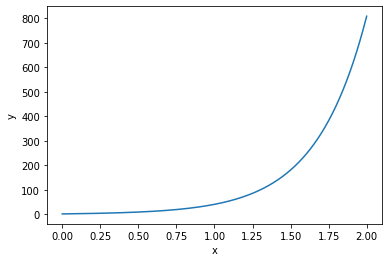

In [ ]:
#4pt
def model(U, x):
    y, z = U
    
    dy_dx = z - 2*y
    dz_dx = 30*np.exp(3*x)
    
    return np.array([dy_dx, dz_dx])

y0 = [2, 12]
a, b = 0, 2

x, y = SODE(a, b, y0, model)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

3- The exact solution of the second-order differential equation is $g(x)= 2e^{3x}-e^{-2x}+1$. Plot the absolute value, $\mid y_k - g_k\mid$ against x_k.

<font color=red> (3/3) </font>

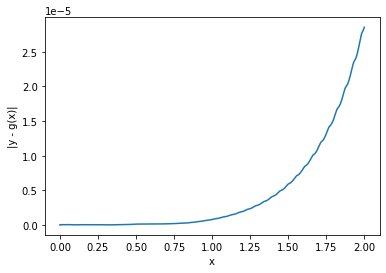

In [ ]:
#3pt
g = lambda x: 2*np.exp(3*x) - np.exp(-2*x) + 1

plt.plot(x, abs(y - g(x)))
plt.xlabel("x")
plt.ylabel("|y - g(x)|")
plt.show()

4- Write a Write a function called **L2_error** that takes $a,b,H$ and return the L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_0^N H(y_k - g_k)^2$$

<font color=red> (3/3) </font>

In [ ]:
#3pt
def L2_error(a, b, H):
    x, y = SODE(a, b, y0, model, H)
    L2Er = sum(H * (y - g(x))**2)
    
    return L2Er

4- Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

<font color=red> (3/3) </font>

In [ ]:
#3pt
a, b = 0, 2
Hj = np.array([10**-i for i in range(1,5)])
L2Erj = np.array([L2_error(a, b, H) for H in Hj])

5- Plot the array of $L2Er_j$ against the array of $H_j$.

<font color=red> (3/3) </font>

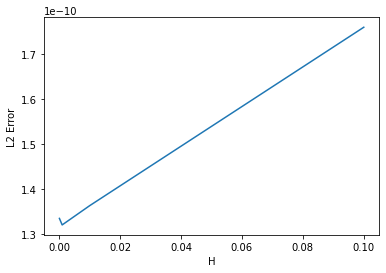

In [ ]:
#3pt
plt.plot(Hj, L2Erj)
plt.xlabel("H")
plt.ylabel("L2 Error")
plt.show()

# Assignment 1

**Exercise 1**

1- Write a program that asks the user to enter a word and determines whether the word is a
palindrome or not. A palindrome is a word that reads the same backwards as forwards.

In [ ]:
# #Program 1
# word=input("Enter a word: ")
# if word.lower()==word.lower()[::-1]:
#   print("The word {} is a palindrome.". format(word))
# else:
#   print("The word {} is not a palindrome.". format(word))

#Program 2
word1=input("Enter a word: ")
word=word1.lower()
rev_word = ""
for i in word:
    rev_word = i + rev_word
if (word == rev_word):
    print("The word {} is a palindrome.". format(word1))
else:
    print("The word {} is not a palindrome.". format(word1))

Enter a word: reo
The word reo is not a palindrome.


2- A simple way to estimate the number of words in a string is to count the number of spaces
in the string. Write a program that asks the user for a string and returns an estimate of how
many words are in the string.

In [ ]:
string1=input("Enter a string: ")
print("The number of words in the string is {}.".format(len(string1.split())))

Enter a string: njjgg
The number of words in the string is 1.


3-Write a program that asks the user for a large integer and inserts commas into it according
to the standard American convention for commas in large numbers. For instance, if the user
enters 1000000, the output should be 1,000,000.

In [ ]:
# #Program 1
# int1=eval(input("Enter a large integer: "))
# int1=list(str(int1))
# for i in range(len(int1))[::-3][1:]:
#     int1.insert(i+1,",")
# print("{}".format("".join(int1)))

# #Program 2
# int1 =eval(input("enter a large integer: "))
# x=f'{int1:,}'.replace('.',',')
# print(x)

# Program 3
int1=eval(input("Enter a large integer: "))
print("{:,}".format(int1))

Enter a large integer: 89007
89,007


**Exercise 2**

The goal of this exercise is to see if you can mimic the behavior of the **in** operator and the
**count** and **index** methods using only variables, for loops, and if statements.

1- Without using the **in** operator, write a program that asks the user for a string and a letter
and prints out whether or not the letter appears in the string.


In [ ]:
# string_2_1=input("Enter a string: ")
# letter_2_1=input("Enter a letter: ")
# def Text (string_2_1, letter_2_1):
#   i=0
#   while string_2_1[i] != letter_2_1:
#     i+=1
#     if i>(len(string_2_1)-1):
#       return "The letter {} is not in {}".format(letter_2_1, string_2_1)
#   return "The letter {} is in {}".format(letter_2_1, string_2_1)
# Text(string_2_1, letter_2_1)

string_2_l=input("Enter a string: ")
letter_2_1=input("Enter a letter: ")
string_2_1=string_2_l.lower()
for i in range(len(string_2_1)):
    if string_2_1[i] == letter_2_1:
        print("The letter {} is in {}".format(letter_2_1, string_2_l))
        break
    if i==(len(string_2_1)-1):
        print("The letter {} is not in {}".format(letter_2_1, string_2_l))


Enter a string: jhjkhiuiuio
Enter a letter: u
The letter u is in jhjkhiuiuio


2- Without using the **count** method, write a program that asks the user for a string and a
letter and counts how many occurrences there are of the letter in the string.


In [ ]:
string_2_2=input("Enter a string: ")
letter_2_2=input("Enter a letter: ")
counter=0
for i in string_2_2:
  if i==letter_2_2:
    counter=counter + 1
print("The letter {} appears {} times".format(letter_2_2, counter))


Enter a string: gfgfhghgtguyiuulii
Enter a letter: z
The letter z appears 0 times


3- Without using the **index** method, write a program that asks the user for a string and
a letter and prints out the index of the first occurrence of the letter in the string. If the
letter is not in the string, the program should say so.

In [ ]:
string_2_3=input("Enter a string: ")
letter_2_3=input("Enter a letter: ")
i=0
for j in string_2_3:
  if j==letter_2_3:
    break
  i=i+1
if i==len(string_2_3):
  print("Not in string")
else:
  print(i)

Enter a string: vdfvdfvdfvdvd
Enter a letter: z
Not in string


**Exercise 3**

Write a function that takes any two lists L and M of the same size and adds their elements together to form a new list N whose elements are sums of the corresponding elements in L and M. For instance, if L=[3,1,4] and M=[1,5,9], then N should equal [4,6,13].

In [ ]:
def Vect_Add(L,M):
  N=[a + b for a, b in zip(L, M)]
  return N

#Test
L=[3,1,4]
M=[1,5,9]
Vect_Add(L, M)

[4, 6, 13]

**Exercise 4**

Write a program that removes any repeated items from a list so that each item appears at most
once. For instance, the list [1,1,2,3,4,3,0,0] would become [1,2,3,4,0].

In [ ]:
def Repeated_remover(list_4):
  non_rep_list = []
  [non_rep_list.append(x) for x in list_4 if x not in non_rep_list]
  return non_rep_list
  
#Test
g=[1,1,2,3,4,3,0,0]
Repeated_remover(g)


**Exercise 5**

<font color='red'> (3/3)</font>

Let L=[2,3,5,7,11,13,17,19,23,29,31,37,41,43,47]. Use a list comprehension to
produce a list of the gaps between consecutive entries in L. Then find the maximum gap size
and the percentage of gaps that have size 2.

In [ ]:
L=[2,3,5,7,11,13,17,19,23,29,31,37,41,43,47]
gaps=[y-x for x, y in zip(L[:-1], L[1:])]
max_gap_size=max(gaps)
percentage_gaps_2=(gaps.count(2)/len(gaps))*100
#percentage_gaps_2 = (len([i for i in gaps if i == 2]) / len(gaps)) * 100
print("List of gaps between consecutive entries: ", gaps, "\n", "Maximum gap size: ", max_gap_size, "\n", "Percentage of gaps of size 2: ", percentage_gaps_2)

List of gaps between consecutive entries:  [1, 2, 2, 4, 2, 4, 2, 4, 6, 2, 6, 4, 2, 4] 
 Maximum gap size:  6 
 Percentage of gaps of size 2:  42.857142857142854


**Exercise 6**

<font color='red'> (4/4)</font>

1- Using the list comprehensions, write a function, **ListComp** that takes a list $L$ of strings as input and returns 
- a list that consists of the strings of $L$ with their first characters removed
- a list of the lengths of the strings of $L$
- a list that consists of only those strings of $L$ that are at least 5 characters long

In [ ]:
def ListComp(L):
  x=[i[1:] for i in L]
  y=[len(i) for i in L]
  z=[i for i in L if len(i)>=5]
  return "First characters removed: {}, Length of strings: {}, Strings at least 5 characters long {}".format(x, y, z)

2- Test your function **ListComp** by using the surname of your group members

In [ ]:
L=["Onyando", "Owusu", "Ouraga", "Nyinawumuntu", "Musabyimana"]
ListComp(L)

"First characters removed: ['nyando', 'wusu', 'uraga', 'yinawumuntu', 'usabyimana'], Length of strings: [7, 5, 6, 12, 11], Strings at least 5 characters long ['Onyando', 'Owusu', 'Ouraga', 'Nyinawumuntu', 'Musabyimana']"

**Exercise 7 <font color='red'>5.5/6</font>**

1- Write a program that repeatedly asks the user to enter product names and prices. Store all
of these in a dictionary whose keys are the product names and whose values are the prices.
When the user is done entering products and prices, allow them to repeatedly enter a product
name and print the corresponding price or a message if the product is not in the dictionary.

<font color='red'>2.5/3</font>

In [ ]:
#Enter products and prices
dictio={}
cont="Yes"
while cont=="Yes":
  prod_name, price=input("Enter the product name and its price separating the values with whitespace: ").split()
  dictio[prod_name]=int(price)
  cont=input("Do you want to enter another product? Enter Yes or No.")
#Check product prices
cont2="Yes"
while cont2=="Yes":
  pos_prod_name=input("Enter the product whose price you need to check: ")
  if pos_prod_name not in dictio.keys():
    print("The product is not in the product list.")
  else:
    print("The price of {} is {}". format(pos_prod_name, dictio.get(pos_prod_name)))
  cont2=input("Do you want to check the price of another product? Enter Yes or No.")

Enter the product name and its price separating the values with whitespace: a 1
Do you want to enter another product? Enter Yes or No.Yes
Enter the product name and its price separating the values with whitespace: b 1
Do you want to enter another product? Enter Yes or No.Yes
Enter the product name and its price separating the values with whitespace: c 1
Do you want to enter another product? Enter Yes or No.n
Enter the product whose price you need to check: b
The price of b is 1
Do you want to check the price of another product? Enter Yes or No.n


2- Using the dictionary created above, allow the user to enter a dollar amount and print out all the products whose price is less than that amount.

<font color='red'>3/3</font>

In [ ]:
dollar_amount=eval(input("Enter a dollar amount: "))
output_7_2=[i for i in dictio if dictio[i]<dollar_amount]
output_7_2

Enter a dollar amount: 3


['a', 'b', 'c']

**Exercise 8 <font color='red'>5/8</font>**

1 - Repeatedly ask the user to enter a team name and the how many games the team won and
how many they lost. Store this information in a dictionary where the keys are the team names
and the values are lists of the form [wins, losses].

<font color='red'>2/2</font>

In [ ]:
#Enter team name, games won and lost
dictio_8={}
cont="Yes"
while cont=="Yes":
  team_name, wins, losses=input("Enter the team name, wins and losses separating the values with whitespace: ").split()
  dictio_8[team_name]=[int(wins), int(losses)]
  cont=input("Do you want to enter another team? Enter Yes or No.")
#Dictionary
dictio_8

Enter the team name, wins and losses separating the values with whitespace: a 3 2
Do you want to enter another team? Enter Yes or No.Yes
Enter the team name, wins and losses separating the values with whitespace: b 2 4
Do you want to enter another team? Enter Yes or No.Yes
Enter the team name, wins and losses separating the values with whitespace: c 2 2
Do you want to enter another team? Enter Yes or No.n


{'a': [3, 2], 'b': [2, 4], 'c': [2, 2]}

2- Using the dictionary created above, allow the user to enter a team name and print out the team’s winning percentage.

<font color='red'>1/2</font>

In [ ]:
team_name=input("Enter a team name: ")
[(dictio_8[i][0]/sum(dictio_8[i]))*100 for i in dictio_8 if i==team_name]

Enter a team name: c


[50.0]

3- Using the dictionary, create a list whose entries are the number of wins of each team.

<font color="red">2/2</font>

In [ ]:
[dictio_8[i][0] for i in dictio_8]

[3, 2, 2]

4- Using the dictionary, create a list of all those teams that have winning records.

<font color="red">0/2</font>

In [ ]:
[i for i in dictio_8 if dictio_8[i][0] !=0]

['a', 'b', 'c']

**Exercise 9** <font color=red> Correct(3/3) </font>

Write a function called matches that takes two strings as arguments and returns how many
matches there are between the strings. A match is where the two strings have the same character at the same index. For instance, 'python' and 'path' match in the first, third, and
fourth characters, so the function should return 3.

In [ ]:
def matches (string9_1, string9_2):
  l=min(len(string9_1), len(string9_2))
  count=0
  for i in range(l):
    if string9_1[i]==string9_2[i]:
      count+=1
  return(count)

#Test
matches ("python", "path")
matches("Conform","comfort")

4

**Exercise 10** <font color=red> (2.75/3) </font>

Recall that if s is a string, then s.find('a') will find the location of the first a in s. The
problem is that it does not find the location of every a. Write a function called findall that
given a string and a single character, returns a list containing all of the locations of that character in the string. It should return an empty list if there are no occurrences of the character
in the string.

 <font color=red> You should return the locations not the indexes </font>

In [ ]:
def findall(s, a):
  occurrences=[]
  for i in range(len(s)):
      if s[i]==a:
          occurrences.append(i)
  return occurrences

#Test
s="appearances"
a="e"
findall(s, a)

[3, 9]

**Exercise 11**

Write a function that takes two already sorted lists (ascending order) of possibly different lengths,
and merges them into a single sorted list.

1- Do this using the sort method. Function name is **merge1**

In [ ]:
def merge1(L1, L2):
    L1.extend(L2)
    L1.sort()
    return L1

2- Do this without using the sort method. Function name is **merge2**

In [ ]:
def merge2(L1, L2):
    L1.extend(L2)
    E=[]
    while len(L1)>0:
        minim=min(L1)
        E.append(minim)
        L1.remove(minim)
    return E

3- Test the two function using the list

L1 = [15, 20, 40, 58, 62, 64];
L2 = [58, 60, 62, 64, 70]

In [ ]:
print(merge1([15, 20, 40, 58, 62, 64], [5,58, 60, 62, 64, 70]))
print(merge2([15, 20, 40, 58, 62, 64], [5,58, 60, 62, 64, 70]))

[5, 15, 20, 40, 58, 58, 60, 62, 62, 64, 64, 70]
[5, 15, 20, 40, 58, 58, 60, 62, 62, 64, 64, 70]


**Exercise 12**

1- Let us consider a continuous function “f” which is defined on the closed interval [a, b], is given with f(a) and f(b) of different signs. Then by intermediate theorem, there exists a point x belong to (a, b) for which f(x) = 0. The bisection method is an approximation method to find the roots of the given equation by repeatedly dividing the interval. This method will divide the interval until the resulting interval is found, which is extremely small.

Let $x_0 \in [a,b]$ be the solution of the equation $f(x) = 0$. Write a function named **Bissection** that
- returns $\bar{x}$ and $f(\bar{x})$  such that $ \mid \bar{x} - x_0 \mid \leq \epsilon, $ if $f(a)\times f(b)\leq 0$
- prints "Bissection method failed", otherwise.

for the given inputs $f,a,b$ and $\epsilon$ with a default value $10^{-2}$.


<font color=blue> Your function should return only $\bar{x}$ and $f(\bar{x})$ </font>

In [ ]:
def Bissection(f,a,b,e=0.01):
    if f(a)*f(b)<=0:
        while (abs(a - b) > e):
            if f((a+b)/2)==0:
                return (a+b)/2, f((a+b)/2)
            else:
                if f(a)*f((a+b)/2) > 0:
                    a = (a+b)/2
                else:
                    b = (a+b)/2     
        return a,b,f(a)
    else:
        return "Bissection method failed"
    

2- Test your function **Bissection** for $ f(x) = x^3 -3x - 5$, $a=-10$ and $b=10$

In [ ]:
f=lambda x:x**3-3*x-5
Bissection(f, -10, 10) 

(2.275390625, 2.28515625, -0.04555877298116684)

**Exercise 13**

1- Write a function called <b>number_of_factors</b> that takes a positive integer and returns how many factors the number has; and a list of its factors.

<font color='red'> Correct but not efficient </font> 


In [ ]:
def number_of_factors(n):
  count=1
  H=[]
  for i in range (1, n//2+1):
    if n%i==0:
      count+=1
      H.append(i)
  H.append(n)
  return "{} has {} factors and they are: {}".format(n, count, H)

#Test
number_of_factors(32)

'32 has 6 factors and they are: [1, 2, 4, 8, 16, 32]'

2- Write a Python function called <b>IsPrime</b> that takes a positive integer, $n$, as input and returns the boolean True if $n$ is a prime number and False, otherwise. 

Note : A prime number (or a prime) is a natural number greater than 1 and that has no positive divisors other than 1 and itself.



In [ ]:
def IsPrime (n):
  if n==1:
    return False
  else:
    for i in range(2, n//2+1):
      if n%i==0:
        return False
  return True

#Test
IsPrime(4)

False

3- Write a function called **primes** that is given a positive integer $n$ and returns a list of the first $n$
primes. Let the default value of n be 100.


In [ ]:
def primes (n=100):
  i=1
  x=[]
  count=0
  while count<n:
    if IsPrime(i):
      count+=1
      x.append(i)
    i+=1
  return x

#Test 
primes(2)

[2, 3]

4- Modify the function above so that there is an optional argument called start that allows
the list to start at a value other than 2. The function should return the first n primes that
are greater than or equal to start. The default value of start should be 2.

<font color='red'> If the default value of start is 2, it means the next n primes that are greater than 2 should include 3. Your function doesn't do that. </font> 


In [ ]:
def primes_2(n, m=2):
  x=[]
  count=0
  while count<n:
    if IsPrime(m):
      count+=1
      x.append(m)
    m+=1
  return x

#Test
primes_2(10,5)

[5, 7, 11, 13, 17, 19, 23, 29, 31, 37]

5- Write a function **V** that takes a positive integer $n$ and a prime number $p$ and returns the greaters integer $r$ such that $p^r$ divides $n$.



In [ ]:
def V(n,p):
  y=[]
  for r in range(0,n):
    if n%(p**r)==0:
      y.append(r)
  return max(y)

#Test
V(40, 5)

1

6- Write the funtion **D** that takes two positive integer $n,m$ and return the sum $S_1$ given by 
 $$ S_1 = \sum_{p\; prime} \Bigl| \nu_p(n) - \nu_p(m)\Bigr| $$

Note that $D(14,24)=4$.



In [ ]:
def D(n,m):
    s1=0
    P=[]
    for i in range(1,max(n,m)+1):
        if n%i==0 and IsPrime(i):
            P.append(i)
    for j in range(1,max(n,m)+1):
        if m%j==0 and IsPrime(j):
            P.append(j)
    P=set(P)
    for i in P:
        s1+=abs(V(n,i)-V(m,i))
    return s1

#Test
D(14,24)

4

7- Write the funtion $P$ that takes two positive integer $n,m$ and return the sum $S_2$ given by 

$$S_2  = \sum_{n=1}^{N}\sum_{m=1}^{N}D(n,m).$$

Note that $S(10)=210$ and $S(10^2)$ = 37018.


In [ ]:
def P(N):
    S2=0
    for n in range(1,N+1):
        for m in range(1,N+1):
            S2+=D(n,m)
    return S2

#Test
print(P(10))
print(P(10**2))

210
37018


# Assignment 2

**Exercise 1**

1- Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.




In [ ]:
def Fibon():
  output = 0
  n0 = 1  
  n1 = 2  
  while n0 <= 4000000:
    if n0 % 2 == 0:
      output += n0
    n0, n1 =n1, n0 + n1
  return output

Fibon()

2- An irrational decimal fraction is created by concatenating the positive integers: 0.12345678910<font color='red'>1</font>112131415161718192021...

It can be seen that the 12th digit of the fractional part is <font color='red'>1</font>. If $d_n$ represents the nth digit of the fractional part, find the value of the following expression.

$$d_1 × d_{10} × d_{100} × d_{1000} × d_{10000} × d_{100000} × d_{1000000}$$

In [ ]:
def Digit():
  d=""
  output = 1
  for i in range(1, 185186):
    d+=str(i)
  for i in range(7):
    output *= int(d[10**i - 1])
  return output
 
Digit()

3- You are given the following information, but you may prefer to do some research for yourself.

- 1 Jan 1900 was a Monday.
- Thirty days has September, April, June and November.
- All the rest have thirty-one, Saving February alone, Which has twenty-eight, rain or shine. And on leap years, twenty-nine.
- A leap year occurs on any year evenly divisible by 4, but not on a century unless it is divisible by 400.

How many Sundays fell on the first of the month during the twentieth century (1 Jan 1901 to 31 Dec 2000)?

In [ ]:
def Sunday_Count():
    def Day_finder(d, m, y):
        t = [ 0, 3, 2, 5, 0, 3, 5, 1, 4, 6, 2, 4 ]
        y -= m < 3
        return (( y + int(y / 4) - int(y / 100) + int(y / 400) + t[m - 1] + d) % 7)
    count=0
    for i in range(1901, 2001):
      for j in range(1, 13):
        if Day_finder(1, j, i)==0:
          count+=1
    return(count)

Sunday_Count()

**Exercise 2**

1- Write a function that takes one argument: A string ``s`` and returns another string ``t``. The string ``t`` should be constructed from ``s`` such that:
* All **upper** case letters from ``s`` are changed into **lower** case.
* All **lower** case letters from ``s`` are changed into **upper** case.
* All characters from ``s`` that are not letters are **deleted**.

In [ ]:
def String_manipulator (s):
  t=""
  for i in s:
    if (i.isalpha()):
            t+=i
  return t.swapcase()
String_manipulator("All upper @#$%^&*(case letters from s are changed into lower case..")


2- Write a function, named **UpLow**, that takes one argument: string ``s`` and **returns** a list with two elements. The first element should be the number of **lowercase letters** in ``s``. The second element should be the number of **uppercase letters** in ``s``.

In [ ]:
def UpLow (s):
  l_count=0
  u_count=0
  for i in s:
    if (i.islower()):
      l_count+=1
    if (i.isupper()):
      u_count+=1
  return [l_count, u_count]

UpLow("Write a function, named UpLow, that takes one argument: string s and returns a list with two elements.")

3- Write a function that takes one argument: string ``s`` and returns either ``True`` or ``False``. It should return ``True`` if and only if **the string is a name**. We assume that a string is a name if:
* It starts with an uppercase letter.
* All the other characters are lowercase letters.

In [ ]:
def Name_checker(s):
  r= False
  if s.isalpha() and (s[0].isupper() and s[1:].islower()):
    r=True
  return r
Name_checker("sSdfghjk")


4- Write a function that takes one argument: list of strings ``L``. The function should return an integer: **The first index where the list contains a name**. If there are no names on the list please return ``-1``

In [ ]:
def Name_checker_2(L):
  for i in range(len(L)):
    for j in L[i].split():
      if Name_checker(j):
        r=i
        return r
  return -1
Name_checker_2(["aJoshua", "$Daniel", "My name is Peter", "alex"])

**Exercise 3**

1- Write a function that takes one argument: List of integers ``L`` and returns the **maximum element in ``L`` which is strictly negative**. If such an element does not exist, **return ``0``**.

In [ ]:
def Maximum_Neg (L):
  g=[]
  [g.append(i) for i in L if i<0]
  if len(g)==0:
    return 0
  return max(g) 


L=[0, 0, -6, -67, 89, 123]
Maximum_Neg(L)


2- Write a function that takes one argument: A 2D array ``M`` and:
* For each **row** computes the maximum negative element.
* Returns the **sum of those elements**.

Please use the function from Problem 3 in your solution.

In [ ]:
import numpy as np
def MaxNegMat_row (M):
    import numpy as np
    g=[]
    rw=np.shape(M)[0]
    for i in range(rw):
        g.append(Maximum_Neg(list(M[i,:])))
    return np.array(g).reshape (rw,-1), sum(g)  


m=np.array([1, -7, 3, -9, 0, 0, 7, -1, 2, -10, 79, 0, 84, 0, 1, -11, 2, -3, 4, 9, 0]).reshape(3,-1)
MaxNegMat_row (m)



3- Write a function that takes one argument: A matrix of integers ``M`` and:
* For each **column** computes the maximum negative element.
* Returns the **sum of those elements**.


In [ ]:
def MaxNegMat_col (M):
  import numpy as np
  g=[]
  l=np.shape(M)[1]
  for i in range(l):
    g.append(Maximum_Neg(list(M[:,i])))
  return np.array(g).reshape (-1, l), sum(g)  

MaxNegMat_col(m)

**Exercise 4**

1- Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$

In [ ]:
from scipy.integrate import quad
eq_1=lambda x: (x**3+5*x-20)/(x**2+3)
eq_2=lambda x: (x-1/3)*((x**4-3)**0.5)
print("A= ", quad(eq_1, 0, 2)[0])
print("B=", quad(eq_2, 3, 5)[0])

2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.

In [ ]:
def Trap(a, b, f, H=0.001):
  N=int((b-a)/H)
  x=np.linspace(a, b, N+1)
  Z=0
  for i in range(1, N+1):
    Z+=H*((f(x[i-1])+f(x[i]))/2)
  return Z

3- Compute the integrales A and B using your function **Trap**

In [ ]:
print("A= ", Trap(a=0, b=2, f=eq_1))
print("B=", Trap(a=3, b=5, f=eq_2))

**Exercise 5**
Write a python code to solve the following system of equations
1. \begin{equation}
\begin{cases}
    x^2 + y + x = 4\\
    2e^x + 3y = 14
\end{cases}
\end{equation}

In [ ]:
from scipy.optimize import fsolve

def non_linear_solver (s):
  x,y=s
  F=np.empty([2])
  F[0]=x**2+y+x-4
  F[1]=2*(np.exp(x))+3*y-14
  return F
Guess_val=np.array([0,0])
v=fsolve(non_linear_solver, Guess_val)
print(" x= {} \n y= {}". format(v[0], v[1,])) 
   

2. 

\begin{equation}
  \begin{cases}
    x - 2y -z +6t= 4\\
    2x + 2y -z - 7t = -4\\
    -x - y +2z + 5t = 5\\
    -3x +4y +2z + 5t = 8\\
  \end{cases}.
\end{equation}

In [ ]:
A = np.array([1, -2, -1, 6, 2, 2, -1, -7, -1, -1, 2, 5, -3, 4, 2, 5]).reshape(4,-1)
b = np.array([4, -4, 5, 8]).reshape(4,-1)
z = np.linalg.solve(A,b)
print(" x= {} \n y= {} \n z= {} \n t= {} \n". format(z[0], z[1,], z[2,], z[3,])) 


**Exercise 6**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    y' = f(x,y),      & \quad \text{on } [a, b]\\&\qquad\qquad\qquad (1)\\
    y(a) = c,
  \end{cases}
\end{equation}
Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.
1. Write a python function <b> EulerMethod </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using Euler method i.e.
$$ y_{k+1} = y_k + Hf(x_k,y_k) $$


In [ ]:
import matplotlib.pyplot as plt
def EulerMethod(a,b,c,N,f):
  x=np.linspace(a,b,N)
  H=x[1]-x[0]
  y=np.zeros(len(x))
  y[0]=c
  for i in range(0, N-1):
    y[i+1] = y[i] + f(x[i], y[i]) * H
  return x, y 





2. Write a python function <b> RK2Method </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using second order Runge-Kutta  method i.e.
\begin{equation}
\begin{cases}
\alpha = f(x_k,y_k)\\\\
y_{k+1} = y_k + Hf(x_k+\dfrac{H}{2}, y_k + \dfrac{H}{2}\alpha)
\end{cases}
\end{equation}

In [ ]:
def RK2Method (a,b,c,N,f):
  x=np.linspace(a,b,N)
  y=np.zeros(len(x))
  H=x[1]-x[0]
  y[0]=c
  for i in range(0, N-1):
    y[i+1] = y[i] + H * f( x[i] + (H / 2.0), y[i] + ((H/2) * f(x[i], y[i] )))
  return x, y

3. Let us consider the initial value problem 

\begin{equation}
  \begin{cases}
    y' = 2y + e^{2x},      & \quad \text{on } [0, 1]\\\\
    y(0) = 3,
  \end{cases}
\end{equation}
with exact solution $g(x) = (x+3)e^{2x}$. 

For $N=200$, use subplot to plot side by side
- the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>
- the absolute error between the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>

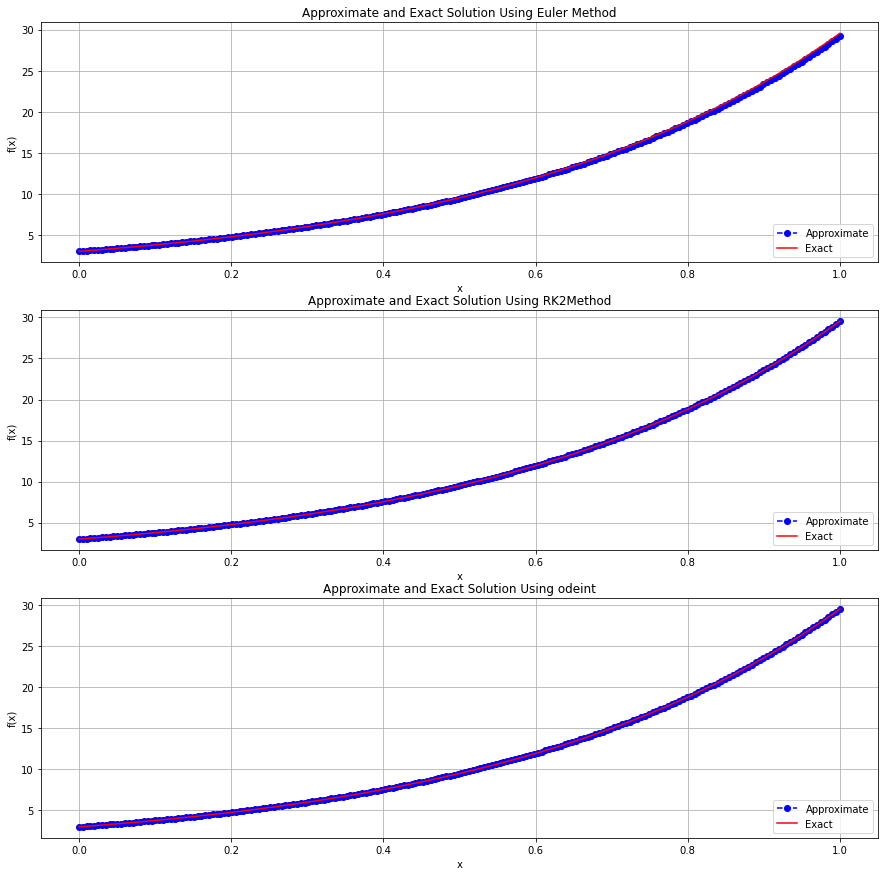

In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#odeint
def model(y,x):
    dydt = (2*y)+(np.exp(2*x))
    return dydt
y0 = 3
x = np.linspace(0,1,200)
y = odeint(model,y0,x)
plt.figure(figsize = (15, 15))
plt.subplot(3,1,3)
plt.plot(x, y,'bo--', label='Approximate')
plt.plot(x, (x+3)*np.exp(2*x), 'red', label='Exact')
plt.title('Approximate and Exact Solution Using odeint')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')


f=lambda x, y: (2*y)+(np.exp(2*x))

# Euler Method
e=EulerMethod(a=0,b=1,c=3,N=200,f=f)
plt.subplot(3,1,1)
plt.plot(e[0], e[1], 'bo--', label='Approximate')
plt.plot(x, (x+3)*np.exp(2*x), 'red', label='Exact')
plt.title('Approximate and Exact Solution Using Euler Method')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')


#RK2Method
r=RK2Method (a=0,b=1,c=3,N=200,f=f)
plt.subplot(3,1,2)
plt.plot(r[0], r[1], 'bo--', label='Approximate')
plt.plot(x, (x+3)*np.exp(2*x), 'red', label='Exact')
plt.title('Approximate and Exact Solution Using RK2Method')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')

#Absolute error
# w=np.absolute(e[1]-(x+3)*np.exp(2*x))
# z=np.absolute(r[1]-(x+3)*np.exp(2*x))
# y=np.absolute(y-(x+3)*np.exp(2*x))

# plt.figure(figsize = (15, 15))
# plt.subplot(3,1,1)
# plt.plot(x, w, 'bo--', label='Error')
# plt.title('Absolute Error of EulerMethod')
# plt.xlabel('x')
# plt.ylabel('Error')
# plt.grid()
# plt.legend(loc='lower right')


# plt.subplot(3,1,2)
# plt.plot(x, z, 'bo--', label='Error')
# plt.title('Absolute Error of RK2Method')
# plt.xlabel('x')
# plt.ylabel('Error')
# plt.grid()
# plt.legend(loc='lower right')


# plt.subplot(3,1,3)
# plt.plot(x, y, 'bo--', label='Error')
# plt.title('Absolute Error of odeint')
# plt.xlabel('x')
# plt.ylabel('Error')
# plt.grid()
# plt.legend(loc='lower right')

# print("odeint is the most efficient method (MSE= {}), followed by RK2Method ({}) and Euler Method ({})".format(er_3, er_2, er_1))

4. Which of the numerical methods used is more efficient? Why?

**Exercise 7**

Consider heat conduction in a rod with constant heat conduction properties, $\lambda^2$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\lambda^2\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{\lambda^2}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \lambda, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [ ]:
def  MatGenerator(a,b,lamda,alp,beta,N,g):
    h=(b-a)/N
    R=-np.eye(N+1,N+1,k=-1)+2*np.eye(N+1,N+1,k=0)-np.eye(N+1,N+1,k=1)
    A=(lamda**2/h**2)*R
    x=np.linspace(a,b,N+1)
    B=np.empty((N+1))
    B[0]=g(x[0])+alp*(lamda**2/h**2)
    B[N]=g(x[N])+beta*(lamda**2/h**2)
    for i in range(1,N):
        B[i]=g(x[i-1])

    return A,B

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, \lambda=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x, $$

and plot the numerical solution

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
g=lambda x: -4*(1+x)*np.exp(x)
A=MatGenerator(0,1,1,-4,0,100,g)[0]
B=MatGenerator(0,1,1,-4,0,100,g)[1]
U=np.linalg.solve(A,B)
print(U)
h=0.01
x=np.arange(0,1+h, h)
plt.figure(figsize = (5, 3), dpi = 300)
plt.plot(x,U)
plt.title('graph of numerical solution of the steady-state heat-conduction problem ')
plt.xlabel('x')
plt.ylabel(' numerical solution of U')
plt.grid()
plt.show()

**Exercise 14**

Create a Module that contains all the functions on this notebook. Then, import the module to test its functions (one function per cell) 

Note: if your group number is **5** then your module should be named **AllFunctionGroup5.py**

In [ ]:
import AllFunctionGroup7 as a7
import numpy as np

In [ ]:
a7.Fibon()

4613732

In [ ]:
a7.Digit()

210

In [ ]:
a7.Sunday_Count()

171

In [ ]:
a7.String_manipulator("All upper @#$%^&*(case letters from s are changed into lower case..")

'aLLUPPERCASELETTERSFROMSARECHANGEDINTOLOWERCASE'

In [ ]:
a7.UpLow("Write a function, named UpLow, that takes one argument: string s and returns a list with two elements.")

[78, 3]

In [ ]:
a7.Name_checker("sSdfghjk")

False

In [ ]:
a7.Name_checker_2(["aJoshua", "$Daniel", "My name is Peter", "alex"])

2

In [ ]:
a7.Maximum_Neg([0, 0, -6, -67, 89, 123])

-6

In [ ]:
import numpy as np
m= np.array([1, -7, 3, -9, 0, 0, 7, -1, 2, -10, 79, 0, 84, 0, 1, -11, 2, -3, 4, 9, 0]).reshape(3,-1)
a7.MaxNegMat_row(m)

(array([[-7],
        [-1],
        [-3]]),
 -11)

In [ ]:
a7.MaxNegMat_col(m)

(array([[ -1,  -7, -10,  -3,   0,   0,   0]]), -21)

In [ ]:
eq_1=lambda x: (x**3+5*x-20)/(x**2+3)
eq_2=lambda x: (x-1/3)*((x**4-3)**0.5)
print("A= ", a7.Trap(a=0, b=2, f=eq_1))
print("B=", a7.Trap(a=3, b=5, f=eq_2))

A=  -7.049316458638298
B= 124.40877672379841


In [ ]:
from scipy.optimize import fsolve
Guess_val=np.array([0,0])
v=fsolve(a7.non_linear_solver, Guess_val)
print(" x= {} \n y= {}". format(v[0], v[1,])) 

 x= 5.13108676346246e-16 
 y= 3.999999999999999


In [ ]:
f=lambda x, y: (2*y)+(np.exp(2*x))
a7.EulerMethod(a=0,b=1,c=3,N=200,f=f)

(array([0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ,
        0.02512563, 0.03015075, 0.03517588, 0.04020101, 0.04522613,
        0.05025126, 0.05527638, 0.06030151, 0.06532663, 0.07035176,
        0.07537688, 0.08040201, 0.08542714, 0.09045226, 0.09547739,
        0.10050251, 0.10552764, 0.11055276, 0.11557789, 0.12060302,
        0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
        0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427,
        0.1758794 , 0.18090452, 0.18592965, 0.19095477, 0.1959799 ,
        0.20100503, 0.20603015, 0.21105528, 0.2160804 , 0.22110553,
        0.22613065, 0.23115578, 0.2361809 , 0.24120603, 0.24623116,
        0.25125628, 0.25628141, 0.26130653, 0.26633166, 0.27135678,
        0.27638191, 0.28140704, 0.28643216, 0.29145729, 0.29648241,
        0.30150754, 0.30653266, 0.31155779, 0.31658291, 0.32160804,
        0.32663317, 0.33165829, 0.33668342, 0.34170854, 0.34673367,
        0.35175879, 0.35678392, 0.36180905, 0.36

In [ ]:
f=lambda x, y: (2*y)+(np.exp(2*x))
a7.RK2Method (a=0,b=1,c=3,N=200,f=f)

(array([0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ,
        0.02512563, 0.03015075, 0.03517588, 0.04020101, 0.04522613,
        0.05025126, 0.05527638, 0.06030151, 0.06532663, 0.07035176,
        0.07537688, 0.08040201, 0.08542714, 0.09045226, 0.09547739,
        0.10050251, 0.10552764, 0.11055276, 0.11557789, 0.12060302,
        0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
        0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427,
        0.1758794 , 0.18090452, 0.18592965, 0.19095477, 0.1959799 ,
        0.20100503, 0.20603015, 0.21105528, 0.2160804 , 0.22110553,
        0.22613065, 0.23115578, 0.2361809 , 0.24120603, 0.24623116,
        0.25125628, 0.25628141, 0.26130653, 0.26633166, 0.27135678,
        0.27638191, 0.28140704, 0.28643216, 0.29145729, 0.29648241,
        0.30150754, 0.30653266, 0.31155779, 0.31658291, 0.32160804,
        0.32663317, 0.33165829, 0.33668342, 0.34170854, 0.34673367,
        0.35175879, 0.35678392, 0.36180905, 0.36

In [ ]:
g=lambda x: -4*(1+x)*np.exp(x)
a7.MatGenerator(0,1,1,-4,0,100,g)

(array([[ 20000., -10000.,      0., ...,      0.,      0.,      0.],
        [-10000.,  20000., -10000., ...,      0.,      0.,      0.],
        [     0., -10000.,  20000., ...,      0.,      0.,      0.],
        ...,
        [     0.,      0.,      0., ...,  20000., -10000.,      0.],
        [     0.,      0.,      0., ..., -10000.,  20000., -10000.],
        [     0.,      0.,      0., ...,      0., -10000.,  20000.]]),
 array([-4.00040000e+04, -4.00000000e+00, -4.08060268e+00, -4.16242147e+00,
        -4.24547268e+00, -4.32977282e+00, -4.41533860e+00, -4.50218696e+00,
        -4.59033502e+00, -4.67980013e+00, -4.77059988e+00, -4.86275204e+00,
        -4.95627463e+00, -5.05118590e+00, -5.14750429e+00, -5.24524852e+00,
        -5.34443752e+00, -5.44509044e+00, -5.54722670e+00, -5.65086595e+00,
        -5.75602808e+00, -5.86273324e+00, -5.97100181e+00, -6.08085445e+00,
        -6.19231205e+00, -6.30539579e+00, -6.42012708e+00, -6.53652764e+00,
        -6.65461941e+00, -6.77442464e+0